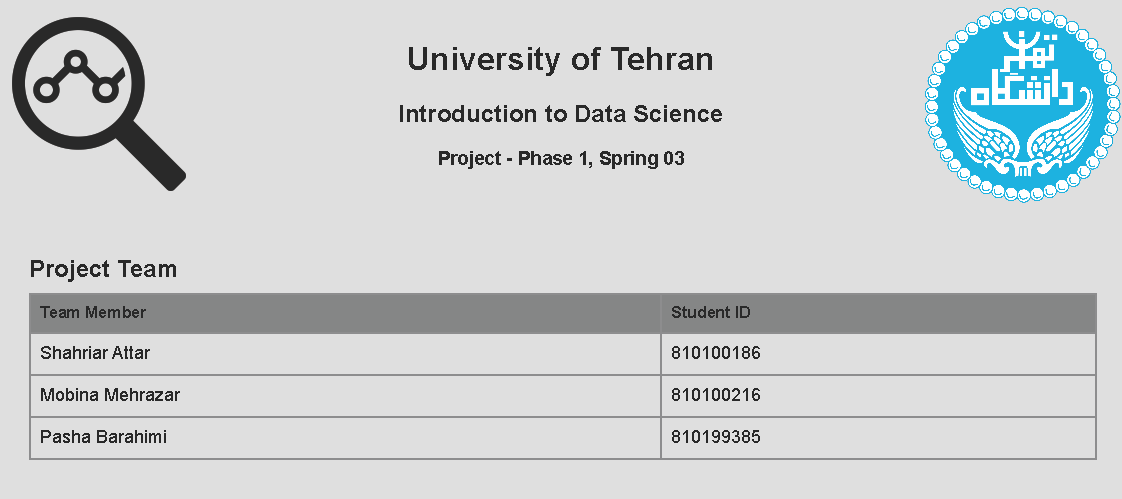

# Project - Phase 1 - Data Cleaning, EDA and Preprocessing

## Introduction

The dataset contains information about car features and their selling price in South Africa. The objective is to predict the selling price of the cars based on the features provided.

## Objectives

The purpose of this phase is as follows:

1. To clean the data and handle missing values.
2. To perform EDA to understand the data better.
3. To preprocess the data for model building.

## Tasks

- Data Cleaning
- Data Preprocessing
- Exploratory Data Analysis (EDA)

## Dataset Description

The dataset consists of the following columns:

- `id`: The unique identifier for a car in the dataset.
- `Make`: The brand of the car.
- `Model`: The model of the car.
- `Features`: The extra features of the car.
- `Kilowatts`: The power of the car in kilowatts.
- `Cylinder Layout`: The number of cylinders and thei layout.
- `Finance Price`: The price of the car if financed per month.
- `Mileage`: The number of miles the car has been driven.
- `Gears`: The number of gears in the car.
- `Fuel Type`: The type of fuel the car uses (e.g. Petrol, Diesel, Electric).
- `No of Seats`: The number of seats in the car.
- `Registration Year`: The year the car was registered.
- `Colour`: The colour of the car.
- `No of Doors`: The number of doors in the car.
- `Spare Key`: Whether the car has a spare key or not.
- `Fuel Consumption`: The fuel consumption of the car.
- `Dekra`: The Dekra condition report of the car. Dekra is a vehicle inspection company.
- `Variant`: The variant of the car.
- `Drive`: The car drive type (e.g. Front Wheel Drive, Rear Wheel Drive, Four Wheel Drive).
- `Body Type`: The body type of the car.
- `Vehicle Service History`: The service history of the car.
- `Maintenance Plan`: The maintenance plan data of the car (if any).
- `Fuel Tank`: The fuel tank capacity of the car.
- `Parking bay number`: The parking bay number of the car.
- `Category`: The category of the car. This shows the working condition of the car. 'A' means the car is in good condition and is newer, while 'B' means the car is a bit older and may not be in the best condition.
- `NaTIS Vehicle status`: The NaTIS (National Administration Traffic Information System) status of the car. This document is the car's birth certificate and contains all the information about the car.
- `Engine Capacity`: The engine capacity of the car.
- `Branch`: The branch where the car is located.
- `Warranty`: The warranty of the car (if any).
- `Transmission`: The transmission type of the car (e.g. Manual, Automatic).
- `Price`: The selling price of the car.

## Environment Setup

We'll begin by setting up your Python environment and installing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

from typing import Optional
import re

In [2]:
DATA_PATH = '../data/cars.csv'
CLEANED_DATA_PATH = '../data/cars_cleaned.csv'
PROCESSED_DATA_PATH = '../data/cars_processed.csv'

MAKE_MODELS_PATH = '../data/make_models/{make}_models.txt'

## Steps

### Data Cleaning

#### Load the Data

In [3]:
df = pd.read_csv(DATA_PATH)

#### Dataset Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8080 entries, 0 to 8079
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 8080 non-null   object 
 1   Kilowatts                7970 non-null   object 
 2   Cylinder Layout          7963 non-null   object 
 3   Finance Price            6608 non-null   object 
 4   Mileage                  8080 non-null   object 
 5   Gears                    7901 non-null   float64
 6   Fuel Type                7985 non-null   object 
 7   No of Seats              7976 non-null   float64
 8   Registration Year        8080 non-null   int64  
 9   Colour                   8080 non-null   object 
 10  No of Doors              7976 non-null   float64
 11  Spare Key                8080 non-null   object 
 12  Fuel Consumption         7571 non-null   object 
 13  Dekra                    8080 non-null   object 
 14  Variant                 

As we can see, the dataset contains 31 columns and 8080 rows. The columns are describe in [Dataset Description](#dataset-description).

In [5]:
df.head()

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Parking bay number,Category,Price,Make,NaTIS Vehicle status,Engine Capacity,Branch,Warranty,Model,Transmission
0,"['Reverse camera', 'Auto stop-start']",250 kW,V6,R 22 416 p/m,72 500km,8.0,Petrol,4.0,2020,Silver,...,NaN,A,R 1 212 900,Porsche,NaN,2998 cc,Midstream (GP),NaN,Cayenne Coupe,Automatic
1,"['CarPlay or Android Auto', 'Reverse camera', ...",NaN,NaN,R 22 326 p/m,3 500km,NaN,Electric,5.0,2023,White,...,NaN,A,R 1 207 900,Jaguar,NaN,NaN,Midstream (GP),2031/02/15,I-Pace,Automatic
2,"['CarPlay or Android Auto', 'Reverse camera', ...",177 kW,I4,R 21 416 p/m,41 500km,8.0,Diesel,7.0,2020,Black,...,NaN,A,R 1 157 900,Land Rover,NaN,1997 cc,JHB South (GP),NaN,Defender 110,Automatic
3,"['CarPlay or Android Auto', 'Reverse camera']",257 kW,I6,R 43 148 p/m,31 000km,8.0,Diesel,5.0,2023,Black,...,NaN,A,R 2 352 900,Land Rover,NaN,2997 cc,Dome (GP),2028/01/05,Range Rover Sport,Automatic
4,[],375 kW,V8,NaN,73 482km,7.0,Petrol,2.0,2015,Yellow,...,NaN,A,R 1 152 000,Mercedes-Benz,NaN,3982 cc,Richmond (WC),NaN,AMG GT,Automatic


#### Removing Duplicates

During the scraping process, we might have scraped the same data multiple times. Let's check for duplicates and remove them.

In [6]:
duplicate_count = df["id"].duplicated().sum()
print(f"Duplicate count: {duplicate_count}")

Duplicate count: 1294


In [7]:
df.drop_duplicates(subset="id", keep="first", inplace=True)

#### Handling Missing Values

Let's check for missing values in the dataset and handle them accordingly.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6786 entries, 0 to 8079
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6786 non-null   object 
 1   Kilowatts                6701 non-null   object 
 2   Cylinder Layout          6694 non-null   object 
 3   Finance Price            5623 non-null   object 
 4   Mileage                  6786 non-null   object 
 5   Gears                    6634 non-null   float64
 6   Fuel Type                6716 non-null   object 
 7   No of Seats              6707 non-null   float64
 8   Registration Year        6786 non-null   int64  
 9   Colour                   6786 non-null   object 
 10  No of Doors              6707 non-null   float64
 11  Spare Key                6786 non-null   object 
 12  Fuel Consumption         6377 non-null   object 
 13  Dekra                    6786 non-null   object 
 14  Variant                  6786

##### Electric Cars

In [9]:
df_electric = df[df["Fuel Type"] == "Electric"]
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1 to 2083
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 13 non-null     object 
 1   Kilowatts                8 non-null      object 
 2   Cylinder Layout          0 non-null      object 
 3   Finance Price            11 non-null     object 
 4   Mileage                  13 non-null     object 
 5   Gears                    9 non-null      float64
 6   Fuel Type                13 non-null     object 
 7   No of Seats              13 non-null     float64
 8   Registration Year        13 non-null     int64  
 9   Colour                   13 non-null     object 
 10  No of Doors              13 non-null     float64
 11  Spare Key                13 non-null     object 
 12  Fuel Consumption         3 non-null      object 
 13  Dekra                    13 non-null     object 
 14  Variant                  13 non

In [10]:
df_electric.head()

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Parking bay number,Category,Price,Make,NaTIS Vehicle status,Engine Capacity,Branch,Warranty,Model,Transmission
1,"['CarPlay or Android Auto', 'Reverse camera', ...",NaN,NaN,R 22 326 p/m,3 500km,NaN,Electric,5.0,2023,White,...,NaN,A,R 1 207 900,Jaguar,NaN,NaN,Midstream (GP),2031/02/15,I-Pace,Automatic
17,"['CarPlay or Android Auto', 'Reverse camera', ...",440 kW,NaN,NaN,28 537km,2.0,Electric,5.0,2022,Red,...,NaN,A,R 1 671 000,Audi,NaN,NaN,Midstream (GP),2027/02/10,e-TRON,Automatic
18,"['CarPlay or Android Auto', 'Reverse camera', ...",210 kW,NaN,R 18 143 p/m,27 000km,NaN,Electric,5.0,2022,Blue,...,MID H088,A,R 977 900,BMW,NaN,NaN,Midstream (GP),2027/08/03,iX3,Automatic
39,[],350 kW,NaN,R 26 326 p/m,12 536km,2.0,Electric,5.0,2022,Blue,...,NaN,A,R 1 427 900,Audi,NaN,NaN,Midstream (GP),NaN,e-TRON,Automatic
76,"['CarPlay or Android Auto', 'Reverse camera', ...",210 kW,NaN,R 17 470 p/m,11 000km,NaN,Electric,5.0,2022,Grey,...,MID H087,A,R 940 900,BMW,NaN,NaN,Midstream (GP),2027/09/19,iX3,Automatic


As we can see, we only have 13 electric cars in the dataset and they contain a lot of missing values. Let's remove the electric cars from the dataset.

In [11]:
df = df[df["Fuel Type"] != "Electric"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6773 entries, 0 to 8079
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6773 non-null   object 
 1   Kilowatts                6693 non-null   object 
 2   Cylinder Layout          6694 non-null   object 
 3   Finance Price            5612 non-null   object 
 4   Mileage                  6773 non-null   object 
 5   Gears                    6625 non-null   float64
 6   Fuel Type                6703 non-null   object 
 7   No of Seats              6694 non-null   float64
 8   Registration Year        6773 non-null   int64  
 9   Colour                   6773 non-null   object 
 10  No of Doors              6694 non-null   float64
 11  Spare Key                6773 non-null   object 
 12  Fuel Consumption         6374 non-null   object 
 13  Dekra                    6773 non-null   object 
 14  Variant                  6773

##### Rows with Missing Values

For some columns, we have a small number of missing values. Let's remove the rows with missing values for these columns.

In [13]:
cols = ["Kilowatts", "Cylinder Layout", "Gears", "Fuel Type", "No of Seats", "No of Doors", "Fuel Consumption", "Drive", "Body Type", "Fuel Tank Capacity", "Engine Capacity", "Transmission"]
df = df.dropna(subset=cols)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 2 to 8077
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6156 non-null   object 
 1   Kilowatts                6156 non-null   object 
 2   Cylinder Layout          6156 non-null   object 
 3   Finance Price            5112 non-null   object 
 4   Mileage                  6156 non-null   object 
 5   Gears                    6156 non-null   float64
 6   Fuel Type                6156 non-null   object 
 7   No of Seats              6156 non-null   float64
 8   Registration Year        6156 non-null   int64  
 9   Colour                   6156 non-null   object 
 10  No of Doors              6156 non-null   float64
 11  Spare Key                6156 non-null   object 
 12  Fuel Consumption         6156 non-null   object 
 13  Dekra                    6156 non-null   object 
 14  Variant                  6156

##### Columns with Many Missing Values

For some columns, we have a large number of missing values. Let's remove these columns from the dataset. For the `Maintenance plan` and `Warranty` columns, we'll replace the missing values with `No`.

In [15]:
cols = ["Parking bay number", "NaTIS Vehicle status"]
df = df.drop(cols, axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 2 to 8077
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6156 non-null   object 
 1   Kilowatts                6156 non-null   object 
 2   Cylinder Layout          6156 non-null   object 
 3   Finance Price            5112 non-null   object 
 4   Mileage                  6156 non-null   object 
 5   Gears                    6156 non-null   float64
 6   Fuel Type                6156 non-null   object 
 7   No of Seats              6156 non-null   float64
 8   Registration Year        6156 non-null   int64  
 9   Colour                   6156 non-null   object 
 10  No of Doors              6156 non-null   float64
 11  Spare Key                6156 non-null   object 
 12  Fuel Consumption         6156 non-null   object 
 13  Dekra                    6156 non-null   object 
 14  Variant                  6156

In [17]:
df["Maintenance plan"] = df["Maintenance plan"].fillna("No")
df["Warranty"] = df["Warranty"].fillna("No")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 2 to 8077
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6156 non-null   object 
 1   Kilowatts                6156 non-null   object 
 2   Cylinder Layout          6156 non-null   object 
 3   Finance Price            5112 non-null   object 
 4   Mileage                  6156 non-null   object 
 5   Gears                    6156 non-null   float64
 6   Fuel Type                6156 non-null   object 
 7   No of Seats              6156 non-null   float64
 8   Registration Year        6156 non-null   int64  
 9   Colour                   6156 non-null   object 
 10  No of Doors              6156 non-null   float64
 11  Spare Key                6156 non-null   object 
 12  Fuel Consumption         6156 non-null   object 
 13  Dekra                    6156 non-null   object 
 14  Variant                  6156

##### Finance Price

For the `Finance Price` column, we'll impute the missing values, after fixing the data type. For now, let's replace the missing values with 'N/A'.

In [19]:
df["Finance Price"] = df["Finance Price"].fillna("N/A")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6156 entries, 2 to 8077
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6156 non-null   object 
 1   Kilowatts                6156 non-null   object 
 2   Cylinder Layout          6156 non-null   object 
 3   Finance Price            6156 non-null   object 
 4   Mileage                  6156 non-null   object 
 5   Gears                    6156 non-null   float64
 6   Fuel Type                6156 non-null   object 
 7   No of Seats              6156 non-null   float64
 8   Registration Year        6156 non-null   int64  
 9   Colour                   6156 non-null   object 
 10  No of Doors              6156 non-null   float64
 11  Spare Key                6156 non-null   object 
 12  Fuel Consumption         6156 non-null   object 
 13  Dekra                    6156 non-null   object 
 14  Variant                  6156

##### Colour

In [21]:
df_undefined_colour = df[df["Colour"] == "Undefined"]
df_undefined_colour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 13 to 6615
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 53 non-null     object 
 1   Kilowatts                53 non-null     object 
 2   Cylinder Layout          53 non-null     object 
 3   Finance Price            53 non-null     object 
 4   Mileage                  53 non-null     object 
 5   Gears                    53 non-null     float64
 6   Fuel Type                53 non-null     object 
 7   No of Seats              53 non-null     float64
 8   Registration Year        53 non-null     int64  
 9   Colour                   53 non-null     object 
 10  No of Doors              53 non-null     float64
 11  Spare Key                53 non-null     object 
 12  Fuel Consumption         53 non-null     object 
 13  Dekra                    53 non-null     object 
 14  Variant                  53 no

In [22]:
df = df[df["Colour"] != "Undefined"]

##### Gears

In [23]:
df[df["Gears"] == 0]

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Branch,Warranty,Model,Transmission
5425,['Auto stop-start'],57 kW,I4,R 2 305 p/m,127 000km,0.0,Hybrid,5.0,2008,Silver,...,No,45 l,B,R 107 000,Toyota,1497 cc,Dome (GP),No,Prius,Automatic
7106,[],165 kW,V6,R 1 212 p/m,163 000km,0.0,Petrol,5.0,2003,Silver,...,No,80 l,B,R 50 900,Mercedes-Benz,3199 cc,Gqeberha (EC),No,E Class Sedan,Automatic
7298,[],165 kW,V6,R 1 539 p/m,148 826km,0.0,Petrol,5.0,2002,Silver,...,No,80 l,B,R 69 900,Mercedes-Benz,3199 cc,Dome (GP),No,E Class Sedan,Automatic


In [24]:
df = df[df["Gears"] != 0]

##### No of Doors

In [25]:
df[df["No of Doors"] == 0]

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Branch,Warranty,Model,Transmission
5452,[],126 kW,I4,R 2 449 p/m,335 500km,5.0,Petrol,3.0,2010,White,...,No,75 l,B,R 119 900,Hyundai,2359 cc,Richmond (WC),No,H-1,Manual


In [26]:
df = df[df["No of Doors"] != 0]

#### Unnecessary Columns

Some columns are not useful for our analysis. Let's remove these columns from the dataset.

In [27]:
df = df.drop("id", axis=1)
df = df.drop("Branch", axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6099 entries, 2 to 8077
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6099 non-null   object 
 1   Kilowatts                6099 non-null   object 
 2   Cylinder Layout          6099 non-null   object 
 3   Finance Price            6099 non-null   object 
 4   Mileage                  6099 non-null   object 
 5   Gears                    6099 non-null   float64
 6   Fuel Type                6099 non-null   object 
 7   No of Seats              6099 non-null   float64
 8   Registration Year        6099 non-null   int64  
 9   Colour                   6099 non-null   object 
 10  No of Doors              6099 non-null   float64
 11  Spare Key                6099 non-null   object 
 12  Fuel Consumption         6099 non-null   object 
 13  Dekra                    6099 non-null   object 
 14  Variant                  6099

In [29]:
df.value_counts("Variant")

Variant
2.4gd-6 R/B Auto                    38
2.8gd-6 R/B Auto                    36
320i Auto (F30)                     34
4 3.0 Td/sd V6 SE                   34
1.0 EcoBoost Titanium               33
                                    ..
500 2.2d Mhawk Auto (W8) 7 Seat      1
500 2.2d Mhawk Auto (W10) 7 Seat     1
500 2.2d Mhawk (W8) 7 Seat AWD       1
500 2.2d Mhawk (W4) 7 Seat           1
xDrive50i M-Sport Auto               1
Name: count, Length: 2226, dtype: int64

The `Variant` column is not useful for our analysis as it contains a lot of unique values. Let's remove this column.

In [30]:
df = df.drop("Variant", axis=1)

#### Fixing Value Formats and Types

Some values in the dataset are not in the correct format. For example, the `Kilowatts` column should be an integer, but it is currently a string ending with 'kW'. Let's fix these value formats.

##### Kilowatts

In [31]:
def find_rows_with_invalid_format(df: pd.DataFrame, column: str, regex: str) -> pd.DataFrame:
    return df[~df[column].str.match(regex, na=False)]

In [32]:
def to_numeric(df: pd.DataFrame, column: str, ignore: Optional[str] = None) -> pd.DataFrame:
    new_df = df.copy()
    new_df[column] = new_df[column].apply(lambda x: re.sub(r"[^\d\.]", "", x) if x != ignore else x)
    new_df[column] = pd.to_numeric(new_df[column], errors="coerce")
    return new_df

In [33]:
regex_kilowatts = r"\d{1,3} kW"
invalid_kilowatts = find_rows_with_invalid_format(df, "Kilowatts", regex_kilowatts)
invalid_kilowatts

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [34]:
df = to_numeric(df, "Kilowatts")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6099 entries, 2 to 8077
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6099 non-null   object 
 1   Kilowatts                6099 non-null   int64  
 2   Cylinder Layout          6099 non-null   object 
 3   Finance Price            6099 non-null   object 
 4   Mileage                  6099 non-null   object 
 5   Gears                    6099 non-null   float64
 6   Fuel Type                6099 non-null   object 
 7   No of Seats              6099 non-null   float64
 8   Registration Year        6099 non-null   int64  
 9   Colour                   6099 non-null   object 
 10  No of Doors              6099 non-null   float64
 11  Spare Key                6099 non-null   object 
 12  Fuel Consumption         6099 non-null   object 
 13  Dekra                    6099 non-null   object 
 14  Drive                    6099

##### Finance Price

In [36]:
regex_finance_price = r"R \d{1,3} ?\d{1,3}?  p/m"
invalid_finance_price = find_rows_with_invalid_format(df, "Finance Price", regex_finance_price)
invalid_finance_price[invalid_finance_price["Finance Price"] != "N/A"]

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [37]:
df = to_numeric(df, "Finance Price", "N/A")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6099 entries, 2 to 8077
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6099 non-null   object 
 1   Kilowatts                6099 non-null   int64  
 2   Cylinder Layout          6099 non-null   object 
 3   Finance Price            5065 non-null   float64
 4   Mileage                  6099 non-null   object 
 5   Gears                    6099 non-null   float64
 6   Fuel Type                6099 non-null   object 
 7   No of Seats              6099 non-null   float64
 8   Registration Year        6099 non-null   int64  
 9   Colour                   6099 non-null   object 
 10  No of Doors              6099 non-null   float64
 11  Spare Key                6099 non-null   object 
 12  Fuel Consumption         6099 non-null   object 
 13  Dekra                    6099 non-null   object 
 14  Drive                    6099

Let's also impute the missing values in the `Finance Price` column using KNN imputation.

In [39]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df.select_dtypes(include=np.number))
df_imputed = pd.DataFrame(imputed_data, columns=df.select_dtypes(include=np.number).columns)

df.reset_index(drop=True, inplace=True)
df["Finance Price"] = df_imputed["Finance Price"]

We can also convert the `Finance Price` column to an integer.

In [40]:
df["Finance Price"] = df["Finance Price"].apply(lambda x: int(x))

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6099 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6099 non-null   object 
 1   Kilowatts                6099 non-null   int64  
 2   Cylinder Layout          6099 non-null   object 
 3   Finance Price            6099 non-null   int64  
 4   Mileage                  6099 non-null   object 
 5   Gears                    6099 non-null   float64
 6   Fuel Type                6099 non-null   object 
 7   No of Seats              6099 non-null   float64
 8   Registration Year        6099 non-null   int64  
 9   Colour                   6099 non-null   object 
 10  No of Doors              6099 non-null   float64
 11  Spare Key                6099 non-null   object 
 12  Fuel Consumption         6099 non-null   object 
 13  Dekra                    6099 non-null   object 
 14  Drive                   

##### Mileage

In [42]:
regex_mileage = r"\d{1,3}?\xa0?\d{1,3}km"
invalid_mileage = find_rows_with_invalid_format(df, "Mileage", regex_mileage)
invalid_mileage

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission
2531,['Reverse camera'],180,V6,4304,km,6.0,Diesel,7.0,2013,White,...,Complete but Due,No,82 l,B,R 216 900,Land Rover,2993 cc,No,Discovery,Automatic
2659,[],120,I4,4394,km,4.0,Diesel,7.0,2012,White,...,"Complete, Up To Date",No,80 l,A,R 221 900,Toyota,2982 cc,No,Fortuner Epic,Automatic
3782,[],130,I4,3267,km,5.0,Diesel,4.0,2009,Black,...,Partial but Up to Date,No,80 l,B,R 159 900,Jeep,2777 cc,No,Wrangler,Automatic
4475,[],120,I4,6835,km,6.0,Diesel,7.0,2014,Grey,...,Partial but Up to Date,No,75 l,B,R 110 000,Chrysler,2777 cc,No,Grand Voyager,Automatic
4683,[],200,V6,2212,km,7.0,Petrol,2.0,2005,Silver,...,No record,No,70 l,B,R 101 900,Mercedes-Benz,3498 cc,No,SLK Class,Automatic
5101,['Reverse camera'],125,I4,1848,km,5.0,Petrol,5.0,2012,Grey,...,No record,No,51 l,B,R 81 900,Jeep,2359 cc,No,Patriot,Manual
5979,[],169,V6,1397,km,5.0,Petrol,7.0,2007,Black,...,No record,No,65 l,B,R 52 000,Chevrolet,3195 cc,No,Captiva,Automatic


In [43]:
df = df.drop(invalid_mileage.index)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   object 
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   object 
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

In [45]:
df = to_numeric(df, "Mileage")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   object 
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### Fuel Consumption

In [47]:
regex_fuel_consumption = r"\d{1,2}(\.\d{1,2})? l/100km"
invalid_fuel_consumption = find_rows_with_invalid_format(df, "Fuel Consumption", regex_fuel_consumption)
invalid_fuel_consumption

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [48]:
df["Fuel Consumption"] = df["Fuel Consumption"].apply(lambda x: x[:-7])

In [49]:
df.head()["Fuel Consumption"]

0    7.65 
1     7.4 
2     9.4 
3    10.2 
4    7.65 
Name: Fuel Consumption, dtype: object

In [50]:
df = to_numeric(df, "Fuel Consumption")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### Fuel Tank Capacity

In [52]:
regex_fuel_tank_capacity = r"\d{1,3} l"
invalid_fuel_tank_capacity = find_rows_with_invalid_format(df, "Fuel Tank Capacity", regex_fuel_tank_capacity)
invalid_fuel_tank_capacity

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [53]:
df = to_numeric(df, "Fuel Tank Capacity")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### Price

In [55]:
regex_price = r"R (\d{1,3} )?(\d{1,3} )?\d{1,3}"
invalid_price = find_rows_with_invalid_format(df, "Price", regex_price)
invalid_price

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [56]:
df = to_numeric(df, "Price")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### Engine Capacity

In [58]:
regex_engine_capacity = r"\d{3,4} cc"
invalid_engine_capacity = find_rows_with_invalid_format(df, "Engine Capacity", regex_engine_capacity)
invalid_engine_capacity

,Features,Kilowatts,Cylinder Layout,Finance Price,Mileage,Gears,Fuel Type,No of Seats,Registration Year,Colour,...,Vehicle Service History,Maintenance plan,Fuel Tank Capacity,Category,Price,Make,Engine Capacity,Warranty,Model,Transmission


In [59]:
df = to_numeric(df, "Engine Capacity")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   float64
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### Gears

In [61]:
df["Gears"] = df["Gears"].apply(lambda x: int(x))

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   int64  
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   float64
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   float64
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### No of Seats, No of Doors

In [63]:
df["No of Seats"] = df["No of Seats"].apply(lambda x: int(x))
df["No of Doors"] = df["No of Doors"].apply(lambda x: int(x))

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   int64  
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   int64  
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   int64  
 11  Spare Key                6092 non-null   object 
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### Spare Key

In [65]:
df.value_counts("Spare Key")

Spare Key
Yes    3920
 No    2172
Name: count, dtype: int64

In [66]:
df["Spare Key"] = df["Spare Key"].apply(lambda x: x == "Yes")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Features                 6092 non-null   object 
 1   Kilowatts                6092 non-null   int64  
 2   Cylinder Layout          6092 non-null   object 
 3   Finance Price            6092 non-null   int64  
 4   Mileage                  6092 non-null   int64  
 5   Gears                    6092 non-null   int64  
 6   Fuel Type                6092 non-null   object 
 7   No of Seats              6092 non-null   int64  
 8   Registration Year        6092 non-null   int64  
 9   Colour                   6092 non-null   object 
 10  No of Doors              6092 non-null   int64  
 11  Spare Key                6092 non-null   bool   
 12  Fuel Consumption         6092 non-null   float64
 13  Dekra                    6092 non-null   object 
 14  Drive                    6092

##### Category

In [68]:
df["Category"] = df["Category"].apply(lambda x: x.strip())

##### Dekra

In [69]:
df.value_counts("Dekra")

Dekra
Dekra Green       3558
Dekra Platinum    1623
Dekra Gold         911
Name: count, dtype: int64

In [70]:
df["Dekra"] = df["Dekra"].apply(lambda x: x[6:])
df.head()["Dekra"]

0    Platinum
1    Platinum
2        Gold
3        Gold
4    Platinum
Name: Dekra, dtype: object

##### Drive

In [71]:
df.value_counts("Drive")

Drive
F      3323
FR     1597
R      1152
F/R      20
Name: count, dtype: int64

In [72]:
df["Drive"] = df["Drive"].apply(lambda x: x.replace("/", ""))
df.value_counts("Drive")

Drive
F     3323
FR    1617
R     1152
Name: count, dtype: int64

#### Column Reordering

Let's reorder the columns in the dataset for better readability.

In [73]:
df = df.reindex(columns=['Make', 'Model', 'Registration Year', 'Mileage'] + list(df.columns.difference(['Make', 'Model', 'Registration Year', 'Mileage'])))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     6092 non-null   object 
 1   Model                    6092 non-null   object 
 2   Registration Year        6092 non-null   int64  
 3   Mileage                  6092 non-null   int64  
 4   Body Type                6092 non-null   object 
 5   Category                 6092 non-null   object 
 6   Colour                   6092 non-null   object 
 7   Cylinder Layout          6092 non-null   object 
 8   Dekra                    6092 non-null   object 
 9   Drive                    6092 non-null   object 
 10  Engine Capacity          6092 non-null   int64  
 11  Features                 6092 non-null   object 
 12  Finance Price            6092 non-null   int64  
 13  Fuel Consumption         6092 non-null   float64
 14  Fuel Tank Capacity       6092

In [74]:
df = df.reindex(columns=[c for c in df.columns if c != "Price"] + ["Price"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6092 entries, 0 to 6098
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     6092 non-null   object 
 1   Model                    6092 non-null   object 
 2   Registration Year        6092 non-null   int64  
 3   Mileage                  6092 non-null   int64  
 4   Body Type                6092 non-null   object 
 5   Category                 6092 non-null   object 
 6   Colour                   6092 non-null   object 
 7   Cylinder Layout          6092 non-null   object 
 8   Dekra                    6092 non-null   object 
 9   Drive                    6092 non-null   object 
 10  Engine Capacity          6092 non-null   int64  
 11  Features                 6092 non-null   object 
 12  Finance Price            6092 non-null   int64  
 13  Fuel Consumption         6092 non-null   float64
 14  Fuel Tank Capacity       6092

#### Save the Cleaned Data

In [75]:
df.to_csv(CLEANED_DATA_PATH, index=False)

### Data Preprocessing

#### Load the Cleaned Data

In [76]:
df_cleaned = pd.read_csv(CLEANED_DATA_PATH)

In [77]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     6092 non-null   object 
 1   Model                    6092 non-null   object 
 2   Registration Year        6092 non-null   int64  
 3   Mileage                  6092 non-null   int64  
 4   Body Type                6092 non-null   object 
 5   Category                 6092 non-null   object 
 6   Colour                   6092 non-null   object 
 7   Cylinder Layout          6092 non-null   object 
 8   Dekra                    6092 non-null   object 
 9   Drive                    6092 non-null   object 
 10  Engine Capacity          6092 non-null   int64  
 11  Features                 6092 non-null   object 
 12  Finance Price            6092 non-null   int64  
 13  Fuel Consumption         6092 non-null   float64
 14  Fuel Tank Capacity      

In [78]:
df_cleaned.head()

,Make,Model,Registration Year,Mileage,Body Type,Category,Colour,Cylinder Layout,Dekra,Drive,...,Gears,Kilowatts,Maintenance plan,No of Doors,No of Seats,Spare Key,Transmission,Vehicle Service History,Warranty,Price
0,Land Rover,Defender 110,2020,41500,Sports Utility Vehicle (SUV),A,Black,I4,Platinum,FR,...,8,177,2025/07/19,5,7,True,Automatic,"Complete, Up To Date",No,1157900
1,Land Rover,Range Rover Sport,2023,31000,Sports Utility Vehicle (SUV),A,Black,I6,Platinum,FR,...,8,257,2028/01/05,5,5,True,Automatic,"Complete, Up To Date",2028/01/05,2352900
2,Mercedes-Benz,AMG GT,2015,73482,Coupe,A,Yellow,V8,Gold,R,...,7,375,No,2,2,False,Automatic,Partial,No,1152000
3,Toyota,Land Cruiser,2018,131000,Sports Utility Vehicle (SUV),A,White,V8,Gold,FR,...,6,195,No,5,7,True,Automatic,"Complete, Up To Date",No,987900
4,Land Rover,Defender 110,2021,61742,Sports Utility Vehicle (SUV),A,White,I4,Platinum,FR,...,8,177,2026/02/16,5,7,True,Automatic,"Complete, Up To Date",2025/02/16,1142000


In [79]:
df = df_cleaned.copy()

#### Create New Features

##### Age of the Car

In [80]:
df["Age"] = 2024 - df["Registration Year"]
df = df.drop("Registration Year", axis=1)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     6092 non-null   object 
 1   Model                    6092 non-null   object 
 2   Mileage                  6092 non-null   int64  
 3   Body Type                6092 non-null   object 
 4   Category                 6092 non-null   object 
 5   Colour                   6092 non-null   object 
 6   Cylinder Layout          6092 non-null   object 
 7   Dekra                    6092 non-null   object 
 8   Drive                    6092 non-null   object 
 9   Engine Capacity          6092 non-null   int64  
 10  Features                 6092 non-null   object 
 11  Finance Price            6092 non-null   int64  
 12  Fuel Consumption         6092 non-null   float64
 13  Fuel Tank Capacity       6092 non-null   int64  
 14  Fuel Type               

##### No of Cylinder

In [82]:
df.value_counts("Cylinder Layout")

Cylinder Layout
I4     4400
I3      685
V6      554
V8      160
I6      148
I5       81
H4       18
L4       13
I2       11
B6        7
T5        4
H6        3
I8        2
F6        2
H8        1
V10       1
V12       1
B4        1
Name: count, dtype: int64

In [83]:
df["No of Cylinders"] = df["Cylinder Layout"].apply(lambda x: int(x[1:]))
df["Cylinder Layout"] = df["Cylinder Layout"].apply(lambda x: x[0])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     6092 non-null   object 
 1   Model                    6092 non-null   object 
 2   Mileage                  6092 non-null   int64  
 3   Body Type                6092 non-null   object 
 4   Category                 6092 non-null   object 
 5   Colour                   6092 non-null   object 
 6   Cylinder Layout          6092 non-null   object 
 7   Dekra                    6092 non-null   object 
 8   Drive                    6092 non-null   object 
 9   Engine Capacity          6092 non-null   int64  
 10  Features                 6092 non-null   object 
 11  Finance Price            6092 non-null   int64  
 12  Fuel Consumption         6092 non-null   float64
 13  Fuel Tank Capacity       6092 non-null   int64  
 14  Fuel Type               

In [85]:
df.head()

,Make,Model,Mileage,Body Type,Category,Colour,Cylinder Layout,Dekra,Drive,Engine Capacity,...,Maintenance plan,No of Doors,No of Seats,Spare Key,Transmission,Vehicle Service History,Warranty,Price,Age,No of Cylinders
0,Land Rover,Defender 110,41500,Sports Utility Vehicle (SUV),A,Black,I,Platinum,FR,1997,...,2025/07/19,5,7,True,Automatic,"Complete, Up To Date",No,1157900,4,4
1,Land Rover,Range Rover Sport,31000,Sports Utility Vehicle (SUV),A,Black,I,Platinum,FR,2997,...,2028/01/05,5,5,True,Automatic,"Complete, Up To Date",2028/01/05,2352900,1,6
2,Mercedes-Benz,AMG GT,73482,Coupe,A,Yellow,V,Gold,R,3982,...,No,2,2,False,Automatic,Partial,No,1152000,9,8
3,Toyota,Land Cruiser,131000,Sports Utility Vehicle (SUV),A,White,V,Gold,FR,4461,...,No,5,7,True,Automatic,"Complete, Up To Date",No,987900,6,8
4,Land Rover,Defender 110,61742,Sports Utility Vehicle (SUV),A,White,I,Platinum,FR,1997,...,2026/02/16,5,7,True,Automatic,"Complete, Up To Date",2025/02/16,1142000,3,4


##### Horsepower

We can calculate the horsepower of the car using the formula: `Horsepower = Kilowatts * 1.34102`. This is done because `Horsepower` is a more common unit of power measurement than `Kilowatts`.

In [86]:
df["Horsepower"] = df["Kilowatts"] * 1.34102
df = df.drop("Kilowatts", axis=1)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     6092 non-null   object 
 1   Model                    6092 non-null   object 
 2   Mileage                  6092 non-null   int64  
 3   Body Type                6092 non-null   object 
 4   Category                 6092 non-null   object 
 5   Colour                   6092 non-null   object 
 6   Cylinder Layout          6092 non-null   object 
 7   Dekra                    6092 non-null   object 
 8   Drive                    6092 non-null   object 
 9   Engine Capacity          6092 non-null   int64  
 10  Features                 6092 non-null   object 
 11  Finance Price            6092 non-null   int64  
 12  Fuel Consumption         6092 non-null   float64
 13  Fuel Tank Capacity       6092 non-null   int64  
 14  Fuel Type               

##### Remaining Maintenance Plan

In [88]:
df["Maintenance plan"] = df["Maintenance plan"].apply(lambda x: pd.to_datetime(x, errors="coerce"))

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Make                     6092 non-null   object        
 1   Model                    6092 non-null   object        
 2   Mileage                  6092 non-null   int64         
 3   Body Type                6092 non-null   object        
 4   Category                 6092 non-null   object        
 5   Colour                   6092 non-null   object        
 6   Cylinder Layout          6092 non-null   object        
 7   Dekra                    6092 non-null   object        
 8   Drive                    6092 non-null   object        
 9   Engine Capacity          6092 non-null   int64         
 10  Features                 6092 non-null   object        
 11  Finance Price            6092 non-null   int64         
 12  Fuel Consumption         6092 non-

In [90]:
df["Remaining Maintenance Plan"] = df["Maintenance plan"].apply(lambda x: (x - pd.Timestamp.now()).days if pd.notnull(x) else 0)
df["Remaining Maintenance Plan"] = df["Remaining Maintenance Plan"].apply(lambda x: x if x >= 0 else 0)
df = df.drop("Maintenance plan", axis=1)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Make                        6092 non-null   object 
 1   Model                       6092 non-null   object 
 2   Mileage                     6092 non-null   int64  
 3   Body Type                   6092 non-null   object 
 4   Category                    6092 non-null   object 
 5   Colour                      6092 non-null   object 
 6   Cylinder Layout             6092 non-null   object 
 7   Dekra                       6092 non-null   object 
 8   Drive                       6092 non-null   object 
 9   Engine Capacity             6092 non-null   int64  
 10  Features                    6092 non-null   object 
 11  Finance Price               6092 non-null   int64  
 12  Fuel Consumption            6092 non-null   float64
 13  Fuel Tank Capacity          6092 

In [92]:
df.head()

,Make,Model,Mileage,Body Type,Category,Colour,Cylinder Layout,Dekra,Drive,Engine Capacity,...,No of Seats,Spare Key,Transmission,Vehicle Service History,Warranty,Price,Age,No of Cylinders,Horsepower,Remaining Maintenance Plan
0,Land Rover,Defender 110,41500,Sports Utility Vehicle (SUV),A,Black,I,Platinum,FR,1997,...,7,True,Automatic,"Complete, Up To Date",No,1157900,4,4,237.36054,422
1,Land Rover,Range Rover Sport,31000,Sports Utility Vehicle (SUV),A,Black,I,Platinum,FR,2997,...,5,True,Automatic,"Complete, Up To Date",2028/01/05,2352900,1,6,344.64214,1322
2,Mercedes-Benz,AMG GT,73482,Coupe,A,Yellow,V,Gold,R,3982,...,2,False,Automatic,Partial,No,1152000,9,8,502.88250,0
3,Toyota,Land Cruiser,131000,Sports Utility Vehicle (SUV),A,White,V,Gold,FR,4461,...,7,True,Automatic,"Complete, Up To Date",No,987900,6,8,261.49890,0
4,Land Rover,Defender 110,61742,Sports Utility Vehicle (SUV),A,White,I,Platinum,FR,1997,...,7,True,Automatic,"Complete, Up To Date",2025/02/16,1142000,3,4,237.36054,634


##### Remaining Warranty

In [93]:
df["Warranty"] = df["Warranty"].apply(lambda x: pd.to_datetime(x, errors="coerce"))

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Make                        6092 non-null   object        
 1   Model                       6092 non-null   object        
 2   Mileage                     6092 non-null   int64         
 3   Body Type                   6092 non-null   object        
 4   Category                    6092 non-null   object        
 5   Colour                      6092 non-null   object        
 6   Cylinder Layout             6092 non-null   object        
 7   Dekra                       6092 non-null   object        
 8   Drive                       6092 non-null   object        
 9   Engine Capacity             6092 non-null   int64         
 10  Features                    6092 non-null   object        
 11  Finance Price               6092 non-null   int64       

In [95]:
df["Remaining Warranty"] = df["Warranty"].apply(lambda x: (x - pd.Timestamp.now()).days if pd.notnull(x) else 0)
df["Remaining Warranty"] = df["Remaining Warranty"].apply(lambda x: x if x >= 0 else 0)
df = df.drop("Warranty", axis=1)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Make                        6092 non-null   object 
 1   Model                       6092 non-null   object 
 2   Mileage                     6092 non-null   int64  
 3   Body Type                   6092 non-null   object 
 4   Category                    6092 non-null   object 
 5   Colour                      6092 non-null   object 
 6   Cylinder Layout             6092 non-null   object 
 7   Dekra                       6092 non-null   object 
 8   Drive                       6092 non-null   object 
 9   Engine Capacity             6092 non-null   int64  
 10  Features                    6092 non-null   object 
 11  Finance Price               6092 non-null   int64  
 12  Fuel Consumption            6092 non-null   float64
 13  Fuel Tank Capacity          6092 

In [97]:
df.head()

,Make,Model,Mileage,Body Type,Category,Colour,Cylinder Layout,Dekra,Drive,Engine Capacity,...,No of Seats,Spare Key,Transmission,Vehicle Service History,Price,Age,No of Cylinders,Horsepower,Remaining Maintenance Plan,Remaining Warranty
0,Land Rover,Defender 110,41500,Sports Utility Vehicle (SUV),A,Black,I,Platinum,FR,1997,...,7,True,Automatic,"Complete, Up To Date",1157900,4,4,237.36054,422,0
1,Land Rover,Range Rover Sport,31000,Sports Utility Vehicle (SUV),A,Black,I,Platinum,FR,2997,...,5,True,Automatic,"Complete, Up To Date",2352900,1,6,344.64214,1322,1322
2,Mercedes-Benz,AMG GT,73482,Coupe,A,Yellow,V,Gold,R,3982,...,2,False,Automatic,Partial,1152000,9,8,502.88250,0,0
3,Toyota,Land Cruiser,131000,Sports Utility Vehicle (SUV),A,White,V,Gold,FR,4461,...,7,True,Automatic,"Complete, Up To Date",987900,6,8,261.49890,0,0
4,Land Rover,Defender 110,61742,Sports Utility Vehicle (SUV),A,White,I,Platinum,FR,1997,...,7,True,Automatic,"Complete, Up To Date",1142000,3,4,237.36054,634,269


#### Encode Categorical Variables

##### Body Type

In [98]:
df.value_counts("Body Type")

Body Type
Sports Utility Vehicle (SUV)    2849
Hatchback                       1490
Sedan                            948
Coupe                            183
Multi Purpose Vehicle            145
Cabriolet                        117
Crossover (SUV)                   95
Bus                               86
Station Wagon                     77
Panel Van                         57
Recreational Vehicle              34
Double Cab                         7
Single Cab                         4
Name: count, dtype: int64

In [99]:
df["Body Type"] = df["Body Type"].apply(lambda x: x if x in df.value_counts("Body Type").head(9).index.values else "Other")

In [100]:
df.value_counts("Body Type")

Body Type
Sports Utility Vehicle (SUV)    2849
Hatchback                       1490
Sedan                            948
Coupe                            183
Multi Purpose Vehicle            145
Cabriolet                        117
Other                            102
Crossover (SUV)                   95
Bus                               86
Station Wagon                     77
Name: count, dtype: int64

In [101]:
df = pd.get_dummies(df, columns=["Body Type"], prefix="Body Type")

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    6092 non-null   object 
 1   Model                                   6092 non-null   object 
 2   Mileage                                 6092 non-null   int64  
 3   Category                                6092 non-null   object 
 4   Colour                                  6092 non-null   object 
 5   Cylinder Layout                         6092 non-null   object 
 6   Dekra                                   6092 non-null   object 
 7   Drive                                   6092 non-null   object 
 8   Engine Capacity                         6092 non-null   int64  
 9   Features                                6092 non-null   object 
 10  Finance Price                           6092 non-null   int6

##### Category

In [103]:
df.value_counts("Category")

Category
A    4138
B    1954
Name: count, dtype: int64

In [104]:
category_encoding = {
    "A": 0,
    "B": 1,
}

df["Category"] = df["Category"].apply(lambda x: category_encoding[x])

In [105]:
df.head()

,Make,Model,Mileage,Category,Colour,Cylinder Layout,Dekra,Drive,Engine Capacity,Features,...,Body Type_Bus,Body Type_Cabriolet,Body Type_Coupe,Body Type_Crossover (SUV),Body Type_Hatchback,Body Type_Multi Purpose Vehicle,Body Type_Other,Body Type_Sedan,Body Type_Sports Utility Vehicle (SUV),Body Type_Station Wagon
0,Land Rover,Defender 110,41500,0,Black,I,Platinum,FR,1997,"['CarPlay or Android Auto', 'Reverse camera', ...",...,False,False,False,False,False,False,False,False,True,False
1,Land Rover,Range Rover Sport,31000,0,Black,I,Platinum,FR,2997,"['CarPlay or Android Auto', 'Reverse camera']",...,False,False,False,False,False,False,False,False,True,False
2,Mercedes-Benz,AMG GT,73482,0,Yellow,V,Gold,R,3982,[],...,False,False,True,False,False,False,False,False,False,False
3,Toyota,Land Cruiser,131000,0,White,V,Gold,FR,4461,"['CarPlay or Android Auto', 'Reverse camera']",...,False,False,False,False,False,False,False,False,True,False
4,Land Rover,Defender 110,61742,0,White,I,Platinum,FR,1997,"['CarPlay or Android Auto', 'Reverse camera', ...",...,False,False,False,False,False,False,False,False,True,False


##### Colour

In [106]:
df.value_counts("Colour")

Colour
White        2669
Silver       1286
Grey          651
Blue          463
Red           365
Black         270
Gold           86
Orange         58
Bronze         55
Brown          44
Green          42
Beige          30
Yellow         22
Maroon         18
Cream          13
Purple          7
Charcoal        7
Champagne       3
Pink            2
Dark Blue       1
Name: count, dtype: int64

In [107]:
df["Colour"] = df["Colour"].apply(lambda x: x if x in df.value_counts("Colour").head(7).index.values else "Other")

In [108]:
df.value_counts("Colour")

Colour
White     2669
Silver    1286
Grey       651
Blue       463
Red        365
Other      302
Black      270
Gold        86
Name: count, dtype: int64

In [109]:
df = pd.get_dummies(df, columns=["Colour"], prefix="Colour")

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    6092 non-null   object 
 1   Model                                   6092 non-null   object 
 2   Mileage                                 6092 non-null   int64  
 3   Category                                6092 non-null   int64  
 4   Cylinder Layout                         6092 non-null   object 
 5   Dekra                                   6092 non-null   object 
 6   Drive                                   6092 non-null   object 
 7   Engine Capacity                         6092 non-null   int64  
 8   Features                                6092 non-null   object 
 9   Finance Price                           6092 non-null   int64  
 10  Fuel Consumption                        6092 non-null   floa

##### Cylinder Layout

In [111]:
df.value_counts("Cylinder Layout")

Cylinder Layout
I    5327
V     716
H      22
L      13
B       8
T       4
F       2
Name: count, dtype: int64

In [112]:
df["Cylinder Layout"] = df["Cylinder Layout"].apply(lambda x: x if x in df.value_counts("Cylinder Layout").head(2).index.values else "Other")
df.value_counts("Cylinder Layout")

Cylinder Layout
I        5327
V         716
Other      49
Name: count, dtype: int64

In [113]:
df = pd.get_dummies(df, columns=["Cylinder Layout"], prefix="Cylinder Layout")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    6092 non-null   object 
 1   Model                                   6092 non-null   object 
 2   Mileage                                 6092 non-null   int64  
 3   Category                                6092 non-null   int64  
 4   Dekra                                   6092 non-null   object 
 5   Drive                                   6092 non-null   object 
 6   Engine Capacity                         6092 non-null   int64  
 7   Features                                6092 non-null   object 
 8   Finance Price                           6092 non-null   int64  
 9   Fuel Consumption                        6092 non-null   float64
 10  Fuel Tank Capacity                      6092 non-null   int6

##### Dekra

In [114]:
df.value_counts("Dekra")

Dekra
Green       3558
Platinum    1623
Gold         911
Name: count, dtype: int64

In [115]:
dekra_encoding = {
    "Green": 0,
    "Gold": 1,
    "Platinum": 2,
}

df["Dekra"] = df["Dekra"].apply(lambda x: dekra_encoding[x])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    6092 non-null   object 
 1   Model                                   6092 non-null   object 
 2   Mileage                                 6092 non-null   int64  
 3   Category                                6092 non-null   int64  
 4   Dekra                                   6092 non-null   int64  
 5   Drive                                   6092 non-null   object 
 6   Engine Capacity                         6092 non-null   int64  
 7   Features                                6092 non-null   object 
 8   Finance Price                           6092 non-null   int64  
 9   Fuel Consumption                        6092 non-null   float64
 10  Fuel Tank Capacity                      6092 non-null   int6

##### Drive

In [116]:
df.value_counts("Drive")

Drive
F     3323
FR    1617
R     1152
Name: count, dtype: int64

The values are:

- `F`: Front Wheel Drive
- `R`: Rear Wheel Drive
- `FR`: Four Wheel Drive

We will encode these values using 2 columns: `Front Wheel Drive`, `Rear Wheel Drive`. If the car is `Front Wheel Drive`, the value will be True in the `Front Wheel Drive` column and False in the `Rear Wheel Drive` column. If the car is `Rear Wheel Drive`, the value will be True in the `Rear Wheel Drive` column and False in the `Front Wheel Drive` column. If the car is `Four Wheel Drive`, the value will be True in both columns.

In [117]:
df["Drive Front"] = df["Drive"].apply(lambda x: "F" in x)
df["Drive Rear"] = df["Drive"].apply(lambda x: "R" in x)
df = df.drop("Drive", axis=1)
df.head()

,Make,Model,Mileage,Category,Dekra,Engine Capacity,Features,Finance Price,Fuel Consumption,Fuel Tank Capacity,...,Colour_Grey,Colour_Other,Colour_Red,Colour_Silver,Colour_White,Cylinder Layout_I,Cylinder Layout_Other,Cylinder Layout_V,Drive Front,Drive Rear
0,Land Rover,Defender 110,41500,0,2,1997,"['CarPlay or Android Auto', 'Reverse camera', ...",21416,7.65,88,...,False,False,False,False,False,True,False,False,True,True
1,Land Rover,Range Rover Sport,31000,0,2,2997,"['CarPlay or Android Auto', 'Reverse camera']",43148,7.40,80,...,False,False,False,False,False,True,False,False,True,True
2,Mercedes-Benz,AMG GT,73482,0,1,3982,[],10323,9.40,80,...,False,True,False,False,False,False,False,True,False,True
3,Toyota,Land Cruiser,131000,0,1,4461,"['CarPlay or Android Auto', 'Reverse camera']",18325,10.20,138,...,False,False,False,False,True,False,False,True,True,True
4,Land Rover,Defender 110,61742,0,2,1997,"['CarPlay or Android Auto', 'Reverse camera', ...",16444,7.65,88,...,False,False,False,False,True,True,False,False,True,True


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    6092 non-null   object 
 1   Model                                   6092 non-null   object 
 2   Mileage                                 6092 non-null   int64  
 3   Category                                6092 non-null   int64  
 4   Dekra                                   6092 non-null   int64  
 5   Engine Capacity                         6092 non-null   int64  
 6   Features                                6092 non-null   object 
 7   Finance Price                           6092 non-null   int64  
 8   Fuel Consumption                        6092 non-null   float64
 9   Fuel Tank Capacity                      6092 non-null   int64  
 10  Fuel Type                               6092 non-null   obje

##### Features

In [119]:
df["Features"] = df["Features"].apply(lambda x: re.sub(r"['\"\[\]]", "", x))
df["Features"] = df["Features"].apply(lambda x: x.split(", "))
df["Features"] = df["Features"].apply(lambda x: [f.strip() for f in x])
df["Features"] = df["Features"].apply(lambda x: [f for f in x if f != ""])

In [120]:
df.head()

,Make,Model,Mileage,Category,Dekra,Engine Capacity,Features,Finance Price,Fuel Consumption,Fuel Tank Capacity,...,Colour_Grey,Colour_Other,Colour_Red,Colour_Silver,Colour_White,Cylinder Layout_I,Cylinder Layout_Other,Cylinder Layout_V,Drive Front,Drive Rear
0,Land Rover,Defender 110,41500,0,2,1997,"[CarPlay or Android Auto, Reverse camera, Auto...",21416,7.65,88,...,False,False,False,False,False,True,False,False,True,True
1,Land Rover,Range Rover Sport,31000,0,2,2997,"[CarPlay or Android Auto, Reverse camera]",43148,7.40,80,...,False,False,False,False,False,True,False,False,True,True
2,Mercedes-Benz,AMG GT,73482,0,1,3982,[],10323,9.40,80,...,False,True,False,False,False,False,False,True,False,True
3,Toyota,Land Cruiser,131000,0,1,4461,"[CarPlay or Android Auto, Reverse camera]",18325,10.20,138,...,False,False,False,False,True,False,False,True,True,True
4,Land Rover,Defender 110,61742,0,2,1997,"[CarPlay or Android Auto, Reverse camera, Auto...",16444,7.65,88,...,False,False,False,False,True,True,False,False,True,True


In [121]:
type(df.iloc[0]["Features"])

list

In [122]:
features = set()
for f in df["Features"]:
    features.update(f)

features

{'(Fixed) tow bar',
 '2 airbags',
 '2x electrical windows',
 'ABS',
 'Airconditioning',
 'Auto stop-start',
 'CarPlay or Android Auto',
 'ESP (el. stability progr.)',
 'El. mirrors',
 'Front armrest',
 'Hubcaps',
 'Park sensor',
 'Power steering',
 'Radio cd',
 'Rain sensor',
 'Reverse camera',
 'Sliding door left',
 'Sliding door right'}

In [123]:
feature_counts = {}
for f in features:
    feature_counts[f] = 0

for f in df["Features"]:
    for feature in f:
        feature_counts[feature] += 1

feature_counts

{'Reverse camera': 1930,
 'Front armrest': 1,
 'ABS': 1,
 'Rain sensor': 1,
 'El. mirrors': 1,
 'Sliding door right': 1,
 '2 airbags': 1,
 '2x electrical windows': 1,
 'Hubcaps': 1,
 'Power steering': 1,
 'Radio cd': 1,
 'Airconditioning': 1,
 '(Fixed) tow bar': 1,
 'Sliding door left': 1,
 'ESP (el. stability progr.)': 1,
 'Auto stop-start': 1405,
 'CarPlay or Android Auto': 1386,
 'Park sensor': 1}

In [124]:
desired_features = set([k for k, v in feature_counts.items() if v >= 100])

desired_features

{'Auto stop-start', 'CarPlay or Android Auto', 'Reverse camera'}

In [125]:
for f in desired_features:
    df[f"Feature_{f}"] = df["Features"].apply(lambda x: f in x)

df = df.drop("Features", axis=1)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    6092 non-null   object 
 1   Model                                   6092 non-null   object 
 2   Mileage                                 6092 non-null   int64  
 3   Category                                6092 non-null   int64  
 4   Dekra                                   6092 non-null   int64  
 5   Engine Capacity                         6092 non-null   int64  
 6   Finance Price                           6092 non-null   int64  
 7   Fuel Consumption                        6092 non-null   float64
 8   Fuel Tank Capacity                      6092 non-null   int64  
 9   Fuel Type                               6092 non-null   object 
 10  Gears                                   6092 non-null   int6

In [127]:
df.head()

,Make,Model,Mileage,Category,Dekra,Engine Capacity,Finance Price,Fuel Consumption,Fuel Tank Capacity,Fuel Type,...,Colour_Silver,Colour_White,Cylinder Layout_I,Cylinder Layout_Other,Cylinder Layout_V,Drive Front,Drive Rear,Feature_Reverse camera,Feature_Auto stop-start,Feature_CarPlay or Android Auto
0,Land Rover,Defender 110,41500,0,2,1997,21416,7.65,88,Diesel,...,False,False,True,False,False,True,True,True,True,True
1,Land Rover,Range Rover Sport,31000,0,2,2997,43148,7.40,80,Diesel,...,False,False,True,False,False,True,True,True,False,True
2,Mercedes-Benz,AMG GT,73482,0,1,3982,10323,9.40,80,Petrol,...,False,False,False,False,True,False,True,False,False,False
3,Toyota,Land Cruiser,131000,0,1,4461,18325,10.20,138,Diesel,...,False,True,False,False,True,True,True,True,False,True
4,Land Rover,Defender 110,61742,0,2,1997,16444,7.65,88,Diesel,...,False,True,True,False,False,True,True,True,True,True


##### Fuel Type

In [128]:
df.value_counts("Fuel Type")

Fuel Type
Petrol    4228
Diesel    1851
Hybrid      13
Name: count, dtype: int64

In [129]:
df = pd.get_dummies(df, columns=["Fuel Type"], prefix="Fuel Type")

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    6092 non-null   object 
 1   Model                                   6092 non-null   object 
 2   Mileage                                 6092 non-null   int64  
 3   Category                                6092 non-null   int64  
 4   Dekra                                   6092 non-null   int64  
 5   Engine Capacity                         6092 non-null   int64  
 6   Finance Price                           6092 non-null   int64  
 7   Fuel Consumption                        6092 non-null   float64
 8   Fuel Tank Capacity                      6092 non-null   int64  
 9   Gears                                   6092 non-null   int64  
 10  No of Doors                             6092 non-null   int6

##### Transmission

In [131]:
df.value_counts("Transmission")

Transmission
Automatic    3757
Manual       2335
Name: count, dtype: int64

In [132]:
transmission_encoding = {
    "Automatic": 0,
    "Manual": 1,
}

df["Transmission"] = df["Transmission"].apply(lambda x: transmission_encoding[x])

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    6092 non-null   object 
 1   Model                                   6092 non-null   object 
 2   Mileage                                 6092 non-null   int64  
 3   Category                                6092 non-null   int64  
 4   Dekra                                   6092 non-null   int64  
 5   Engine Capacity                         6092 non-null   int64  
 6   Finance Price                           6092 non-null   int64  
 7   Fuel Consumption                        6092 non-null   float64
 8   Fuel Tank Capacity                      6092 non-null   int64  
 9   Gears                                   6092 non-null   int64  
 10  No of Doors                             6092 non-null   int6

##### Vehicle Service History

In [134]:
df.value_counts("Vehicle Service History")

Vehicle Service History
Complete, Up To Date          2680
Partial                       1390
Partial but Up to Date         731
No record                      689
Complete but Due               457
Unverified Service History     145
Name: count, dtype: int64

'No record' and 'Unverified Service History' values don't provide any useful information. Let's replace these values with 'None'.

In [135]:
df["Vehicle Service History"] = df["Vehicle Service History"].apply(lambda x: x if x not in ["No record", "Unverified Service History"] else "None")

In [136]:
df.value_counts("Vehicle Service History")

Vehicle Service History
Complete, Up To Date      2680
Partial                   1390
None                       834
Partial but Up to Date     731
Complete but Due           457
Name: count, dtype: int64

In [137]:
service_history_encoding = {
    "Complete, Up To Date": 0,
    "Partial but Up to Date": 1,
    "Complete but Due": 2,
    "Partial": 3,
    "None": 4,
}

df["Vehicle Service History"] = df["Vehicle Service History"].apply(lambda x: service_history_encoding[x])

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    6092 non-null   object 
 1   Model                                   6092 non-null   object 
 2   Mileage                                 6092 non-null   int64  
 3   Category                                6092 non-null   int64  
 4   Dekra                                   6092 non-null   int64  
 5   Engine Capacity                         6092 non-null   int64  
 6   Finance Price                           6092 non-null   int64  
 7   Fuel Consumption                        6092 non-null   float64
 8   Fuel Tank Capacity                      6092 non-null   int64  
 9   Gears                                   6092 non-null   int64  
 10  No of Doors                             6092 non-null   int6

##### Make & Model

In [139]:
df.value_counts("Make")

Make
Toyota             681
BMW                612
Mercedes-Benz      592
Volkswagen         590
Ford               502
Audi               363
Land Rover         344
Hyundai            319
Nissan             227
Renault            210
Volvo              202
Jeep               190
KIA                131
Suzuki             112
Honda              111
Mini               100
Chevrolet           96
Mazda               86
Haval               84
Jaguar              84
Opel                83
Peugeot             58
Mitsubishi          53
Fiat                37
Mahindra            36
Porsche             32
Subaru              23
Lexus               23
Citroen             19
Chery               18
Alfa Romeo          17
Chrysler            12
Dodge               12
Daihatsu             6
Smart                4
Isuzu                4
GWM                  4
Datsun               3
Chana - Changan      2
Baic                 2
Ssangyong            2
Abarth               1
Seat                 1
Saab  

In [140]:
df = df.groupby("Make").filter(lambda x: len(x) >= 50)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5830 entries, 0 to 6091
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Make                                    5830 non-null   object 
 1   Model                                   5830 non-null   object 
 2   Mileage                                 5830 non-null   int64  
 3   Category                                5830 non-null   int64  
 4   Dekra                                   5830 non-null   int64  
 5   Engine Capacity                         5830 non-null   int64  
 6   Finance Price                           5830 non-null   int64  
 7   Fuel Consumption                        5830 non-null   float64
 8   Fuel Tank Capacity                      5830 non-null   int64  
 9   Gears                                   5830 non-null   int64  
 10  No of Doors                             5830 non-null   int64  
 

In [142]:
df.value_counts("Make")

Make
Toyota           681
BMW              612
Mercedes-Benz    592
Volkswagen       590
Ford             502
Audi             363
Land Rover       344
Hyundai          319
Nissan           227
Renault          210
Volvo            202
Jeep             190
KIA              131
Suzuki           112
Honda            111
Mini             100
Chevrolet         96
Mazda             86
Jaguar            84
Haval             84
Opel              83
Peugeot           58
Mitsubishi        53
Name: count, dtype: int64

In [143]:
res = df.groupby("Make")["Model"].value_counts()
for make in res.index.levels[0]:  # type: ignore
    with open(MAKE_MODELS_PATH.format(make=make), "w", encoding="utf-8") as f:
        f.write(res[make].to_string())

In [144]:
res_dict = res.to_dict()
low_count_models = []
for (make, model), count in res_dict.items():
    if count < 10:
        low_count_models.append((make, model))

low_count_models

[('Audi', 'S3'),
 ('Audi', 'RS3'),
 ('Audi', 'Q8'),
 ('Audi', 'TT'),
 ('Audi', 'A3 Sportback'),
 ('Audi', 'A4 Allroad'),
 ('Audi', 'A7'),
 ('Audi', 'S4'),
 ('Audi', 'TTS'),
 ('Audi', 'A8'),
 ('Audi', 'R8'),
 ('BMW', '2 Series Active Tour'),
 ('BMW', '6 Series'),
 ('BMW', '7 Series'),
 ('BMW', '1 Series (f40)'),
 ('BMW', 'Z4'),
 ('BMW', '3 Series GT'),
 ('BMW', 'X2'),
 ('BMW', '2 Series Gran Coupe'),
 ('BMW', '4 Series Gran Coupe'),
 ('BMW', 'M2'),
 ('BMW', 'X5 M'),
 ('BMW', '5 Series GT'),
 ('BMW', '8 Series'),
 ('BMW', 'X7'),
 ('Chevrolet', 'Aveo'),
 ('Chevrolet', 'Sonic'),
 ('Chevrolet', 'Lumina'),
 ('Chevrolet', 'Optra'),
 ('Chevrolet', 'Orlando'),
 ('Ford', 'Mustang'),
 ('Ford', 'Fiesta ST'),
 ('Ford', 'Territory'),
 ('Ford', 'Tourneo Connect'),
 ('Ford', 'Tourneo Custom'),
 ('Ford', 'Transit Connect'),
 ('Ford', 'Tourneo'),
 ('Ford', 'Transit'),
 ('Ford', 'Fusion'),
 ('Ford', 'KA'),
 ('Ford', 'Ranger'),
 ('Ford', 'B-MAX'),
 ('Ford', 'Ikon'),
 ('Haval', 'H9'),
 ('Honda', 'BR-V'),
 

In [145]:
print(f"Total Combinations: {len(res_dict)}")
print(f"Low Count Combinations: {len(low_count_models)}")

Total Combinations: 355
Low Count Combinations: 216


In [146]:
df["Model"] = df.apply(lambda x: "Other" if (x["Make"], x["Model"]) in low_count_models else x["Model"], axis=1)

In [147]:
df.head()

,Make,Model,Mileage,Category,Dekra,Engine Capacity,Finance Price,Fuel Consumption,Fuel Tank Capacity,Gears,...,Cylinder Layout_Other,Cylinder Layout_V,Drive Front,Drive Rear,Feature_Reverse camera,Feature_Auto stop-start,Feature_CarPlay or Android Auto,Fuel Type_Diesel,Fuel Type_Hybrid,Fuel Type_Petrol
0,Land Rover,Defender 110,41500,0,2,1997,21416,7.65,88,8,...,False,False,True,True,True,True,True,True,False,False
1,Land Rover,Range Rover Sport,31000,0,2,2997,43148,7.40,80,8,...,False,False,True,True,True,False,True,True,False,False
2,Mercedes-Benz,Other,73482,0,1,3982,10323,9.40,80,7,...,False,True,False,True,False,False,False,False,False,True
3,Toyota,Land Cruiser,131000,0,1,4461,18325,10.20,138,6,...,False,True,True,True,True,False,True,True,False,False
4,Land Rover,Defender 110,61742,0,2,1997,16444,7.65,88,8,...,False,False,True,True,True,True,True,True,False,False


In [148]:
df["Make Model"] = df["Make"] + " " + df["Model"]
df = df.drop(["Make", "Model"], axis=1)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5830 entries, 0 to 6091
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Mileage                                 5830 non-null   int64  
 1   Category                                5830 non-null   int64  
 2   Dekra                                   5830 non-null   int64  
 3   Engine Capacity                         5830 non-null   int64  
 4   Finance Price                           5830 non-null   int64  
 5   Fuel Consumption                        5830 non-null   float64
 6   Fuel Tank Capacity                      5830 non-null   int64  
 7   Gears                                   5830 non-null   int64  
 8   No of Doors                             5830 non-null   int64  
 9   No of Seats                             5830 non-null   int64  
 10  Spare Key                               5830 non-null   bool   
 

In [150]:
df.head()

,Mileage,Category,Dekra,Engine Capacity,Finance Price,Fuel Consumption,Fuel Tank Capacity,Gears,No of Doors,No of Seats,...,Cylinder Layout_V,Drive Front,Drive Rear,Feature_Reverse camera,Feature_Auto stop-start,Feature_CarPlay or Android Auto,Fuel Type_Diesel,Fuel Type_Hybrid,Fuel Type_Petrol,Make Model
0,41500,0,2,1997,21416,7.65,88,8,5,7,...,False,True,True,True,True,True,True,False,False,Land Rover Defender 110
1,31000,0,2,2997,43148,7.40,80,8,5,5,...,False,True,True,True,False,True,True,False,False,Land Rover Range Rover Sport
2,73482,0,1,3982,10323,9.40,80,7,2,2,...,True,False,True,False,False,False,False,False,True,Mercedes-Benz Other
3,131000,0,1,4461,18325,10.20,138,6,5,7,...,True,True,True,True,False,True,True,False,False,Toyota Land Cruiser
4,61742,0,2,1997,16444,7.65,88,8,5,7,...,False,True,True,True,True,True,True,False,False,Land Rover Defender 110


In [151]:
df = pd.get_dummies(df, columns=["Make Model"], prefix="Make Model")

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5830 entries, 0 to 6091
Columns: 210 entries, Mileage to Make Model_Volvo Xc90
dtypes: bool(192), float64(2), int64(16)
memory usage: 1.9 MB


#### Save the Preprocessed Data

In [153]:
df = df.reindex(sorted(df.columns), axis=1)
df = df.reindex(columns=[c for c in df.columns if c != "Price"] + ["Price"])

In [154]:
df

,Age,Body Type_Bus,Body Type_Cabriolet,Body Type_Coupe,Body Type_Crossover (SUV),Body Type_Hatchback,Body Type_Multi Purpose Vehicle,Body Type_Other,Body Type_Sedan,Body Type_Sports Utility Vehicle (SUV),...,Mileage,No of Cylinders,No of Doors,No of Seats,Remaining Maintenance Plan,Remaining Warranty,Spare Key,Transmission,Vehicle Service History,Price
0,4,False,False,False,False,False,False,False,False,True,...,41500,4,5,7,422,0,True,0,0,1157900
1,1,False,False,False,False,False,False,False,False,True,...,31000,6,5,5,1322,1322,True,0,0,2352900
2,9,False,False,True,False,False,False,False,False,False,...,73482,8,2,2,0,0,False,0,3,1152000
3,6,False,False,False,False,False,False,False,False,True,...,131000,8,5,7,0,0,True,0,0,987900
4,3,False,False,False,False,False,False,False,False,True,...,61742,4,5,7,634,269,True,0,0,1142000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6085,23,False,False,False,False,True,False,False,False,False,...,340025,4,5,5,0,0,False,1,4,24000
6086,19,False,False,False,False,False,False,False,True,False,...,150788,4,4,5,0,0,False,0,4,25900
6087,23,False,False,False,False,False,False,False,False,False,...,230000,4,5,5,0,0,False,1,4,24900
6088,20,False,False,False,False,True,False,False,False,False,...,321000,4,5,5,0,0,True,1,4,24900


In [155]:
df.to_csv(PROCESSED_DATA_PATH, index=False)

### Exploratory Data Analysis (EDA)

#### Load the Preprocessed and Cleaned Data

In [156]:
df_cleaned = pd.read_csv(CLEANED_DATA_PATH)
df_processed = pd.read_csv(PROCESSED_DATA_PATH)

In [157]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     6092 non-null   object 
 1   Model                    6092 non-null   object 
 2   Registration Year        6092 non-null   int64  
 3   Mileage                  6092 non-null   int64  
 4   Body Type                6092 non-null   object 
 5   Category                 6092 non-null   object 
 6   Colour                   6092 non-null   object 
 7   Cylinder Layout          6092 non-null   object 
 8   Dekra                    6092 non-null   object 
 9   Drive                    6092 non-null   object 
 10  Engine Capacity          6092 non-null   int64  
 11  Features                 6092 non-null   object 
 12  Finance Price            6092 non-null   int64  
 13  Fuel Consumption         6092 non-null   float64
 14  Fuel Tank Capacity      

In [158]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5830 entries, 0 to 5829
Columns: 210 entries, Age to Price
dtypes: bool(192), float64(2), int64(16)
memory usage: 1.9 MB


#### Summary Statistics

In [159]:
df_cleaned.describe()

,Registration Year,Mileage,Engine Capacity,Finance Price,Fuel Consumption,Fuel Tank Capacity,Gears,Kilowatts,No of Doors,No of Seats,Price
count,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6092.000000,6.092000e+03
mean,2015.432042,127381.421701,2006.134767,4790.159718,7.036962,59.948785,6.206172,124.933684,4.611950,5.208634,2.418348e+05
std,4.247221,70812.192041,820.451412,3337.886983,2.045602,15.879327,1.199316,56.729524,0.759837,1.019255,1.878613e+05
min,1998.000000,27.000000,796.000000,648.000000,2.100000,27.000000,4.000000,38.000000,2.000000,2.000000,1.590000e+04
25%,2013.000000,76000.000000,1496.000000,2550.000000,5.600000,50.000000,5.000000,85.000000,4.000000,5.000000,1.159000e+05
50%,2016.000000,119139.000000,1969.000000,3922.000000,6.500000,59.000000,6.000000,115.000000,5.000000,5.000000,1.889000e+05
75%,2019.000000,169121.250000,2199.000000,6013.000000,8.000000,70.000000,7.000000,140.000000,5.000000,5.000000,3.119000e+05
max,2024.000000,712479.000000,6417.000000,43148.000000,17.790000,150.000000,10.000000,460.000000,6.000000,16.000000,2.352900e+06


#### Correlation Matrix

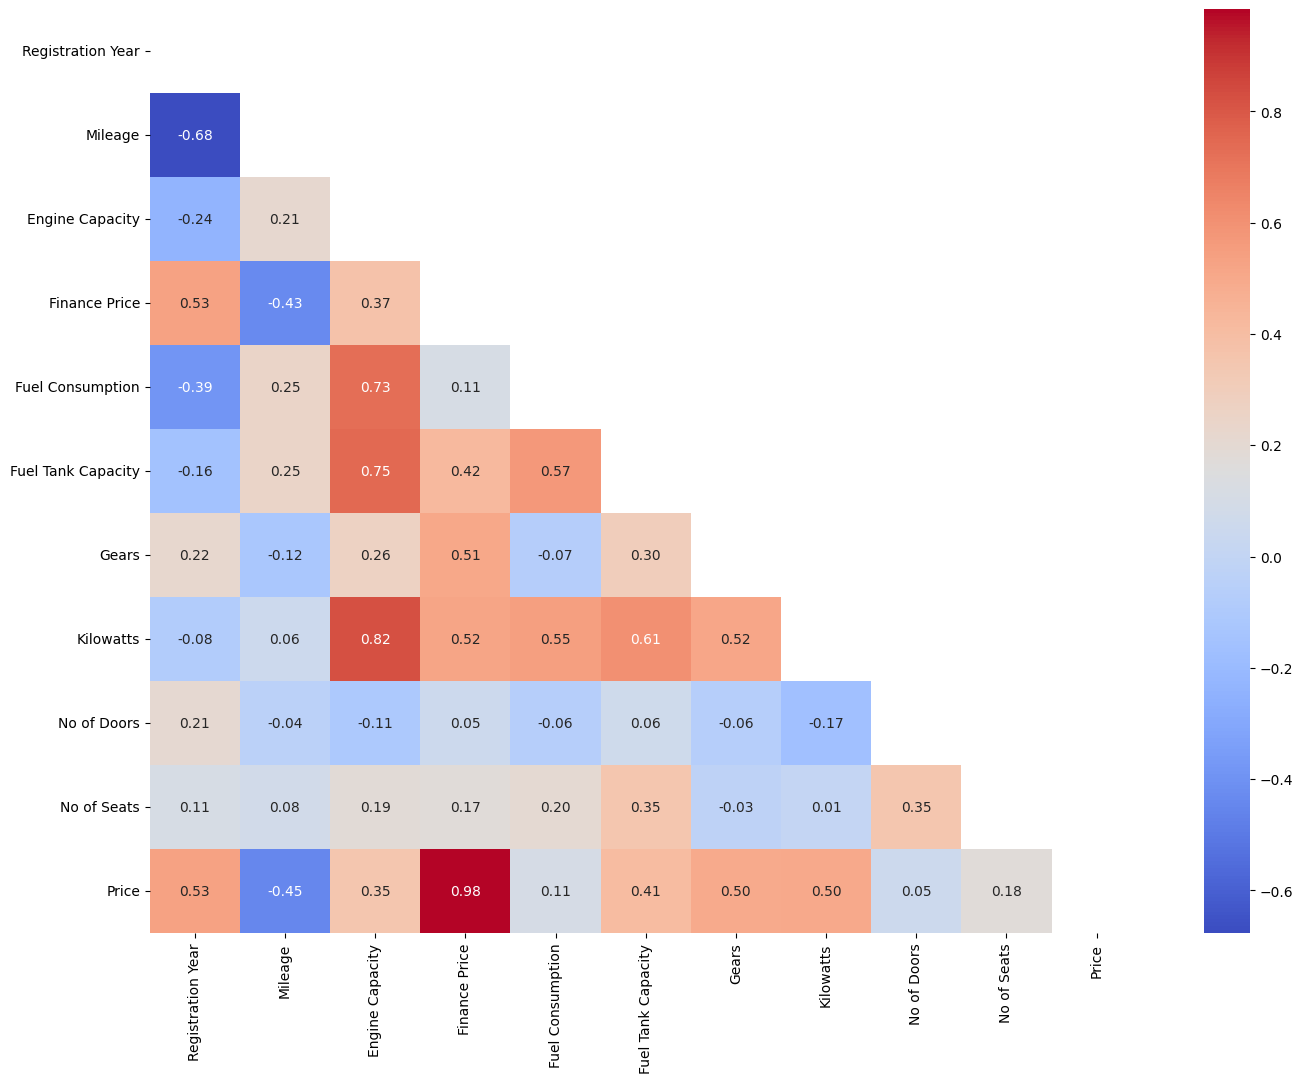

In [160]:
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
corr_matrix = df_cleaned[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
plt.show()

As we can see, the `Price` column has a high correlation with the `Finance Price` column. This is expected as the selling price of the car is usually related to the finance price.

Also, the `Engine Capacity` column has a high correlation with the `Kilowatts`, `Fuel Tank Capacity` and `Fuel Consumption` columns. This is expected as the engine capacity of the car is related to these features.

At last, The `Mileage` column has a high correlation with the `Registration Year` column. This is expected as the mileage of the car increases with the age of the car.

#### Distributions

In [161]:
def hist_plot(df: pd.DataFrame, column: str) -> None:
    plt.figure(figsize=(12, 8))
    sns.histplot(df[column], kde=True)  # type: ignore
    plt.title(f"{column} Histogram")
    plt.show()

In [162]:
def bar_plot(df: pd.DataFrame, column: str, horizontal: bool=False) -> None:
    plt.figure(figsize=(12, 8))
    if horizontal:
        sns.countplot(y=column, data=df)
    else:
        sns.countplot(x=column, data=df)
    plt.title(f"{column} Bar Plot")
    plt.show()

In [163]:
def box_plot(df: pd.DataFrame, column: str) -> None:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x=column)
    plt.title(f"{column} Box Plot")
    plt.show()

##### Registration Year

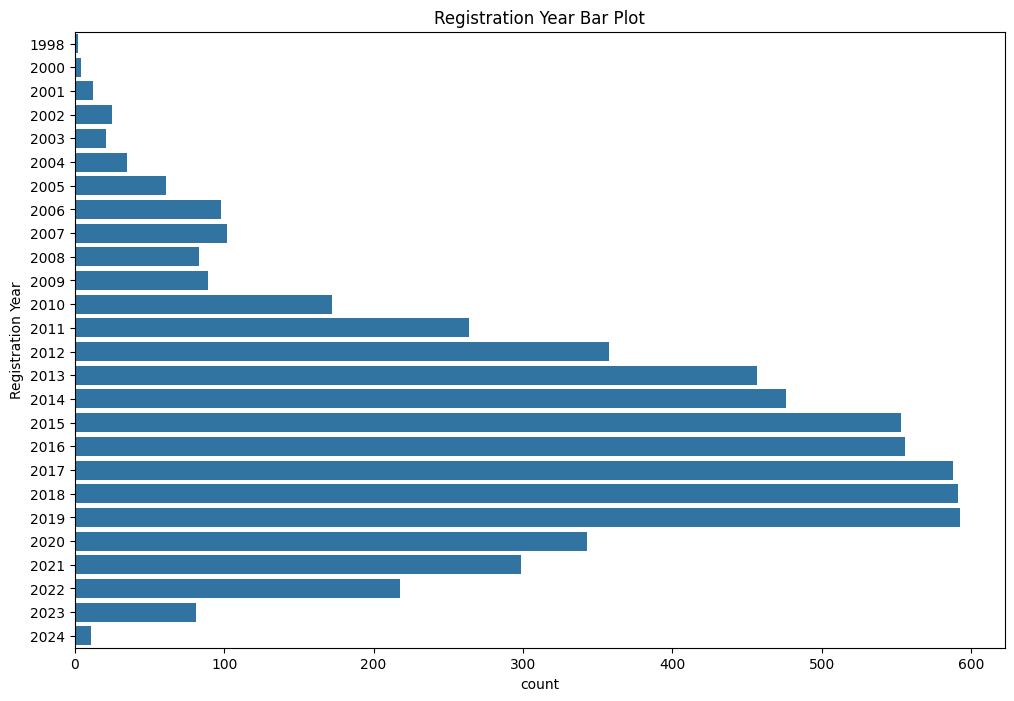

In [164]:
bar_plot(df_cleaned, "Registration Year", horizontal=True)

As it is visible in the above plot, the distribution of the `Registration Year` column is almost a normal distribution. Most of the cars being sold are from the year 2013 to 2020. We could have expected this because very old cars and very new cars are not usually sold. Also, some of the very old cars may be considered as antiques and not sold in the regular market.

##### Mileage

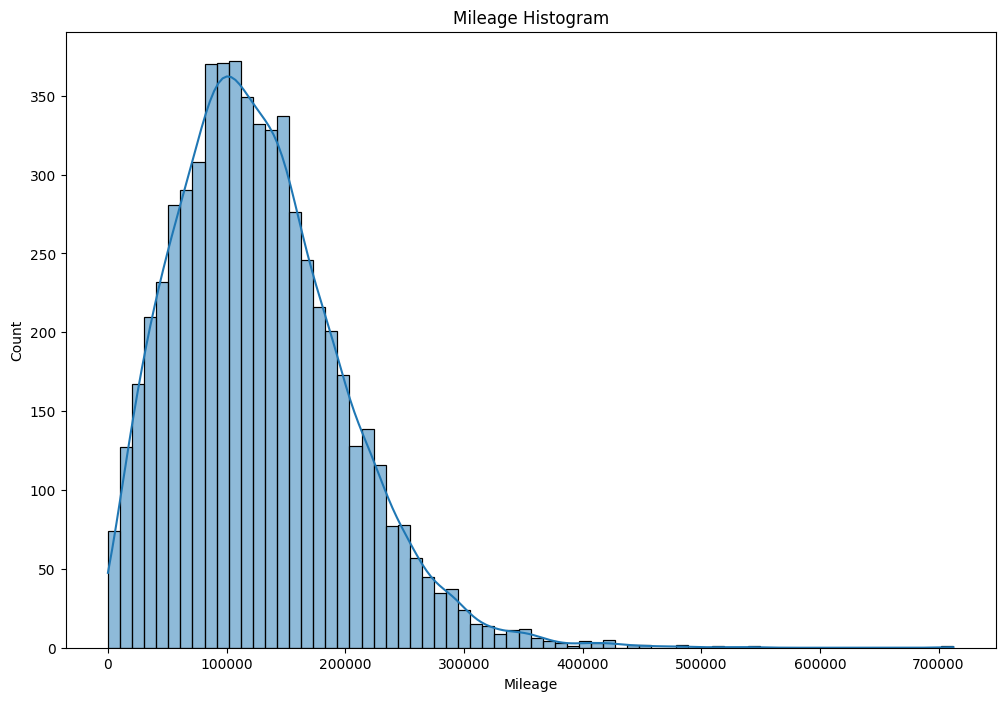

In [165]:
hist_plot(df_cleaned, "Mileage")

The above plot shows that the `Mileage` column is also normally distributed. Most of the cars being sold have a mileage of around 100,000 km. We can explain this with the same logic as the `Registration Year` column. The cars that have a mileage more than 300,000 km are very few and they are usually dismantled for parts.

##### Category

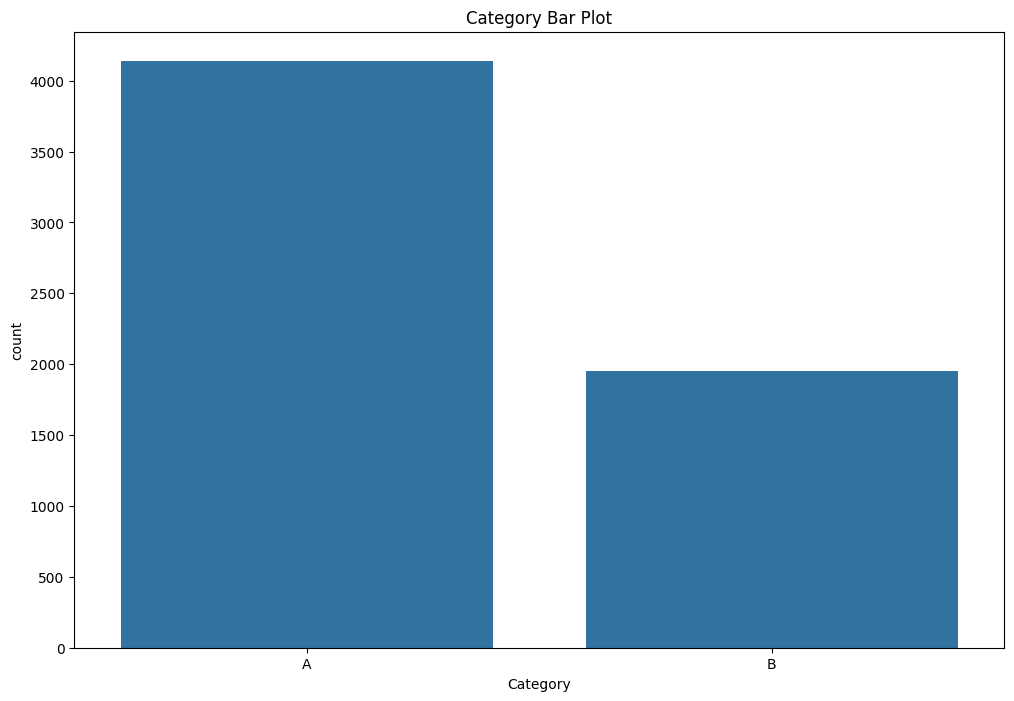

In [166]:
bar_plot(df_cleaned, "Category")

As we can see, the cars in category 'A' are about twice as many as the cars in category 'B'.

##### No of Cylinder

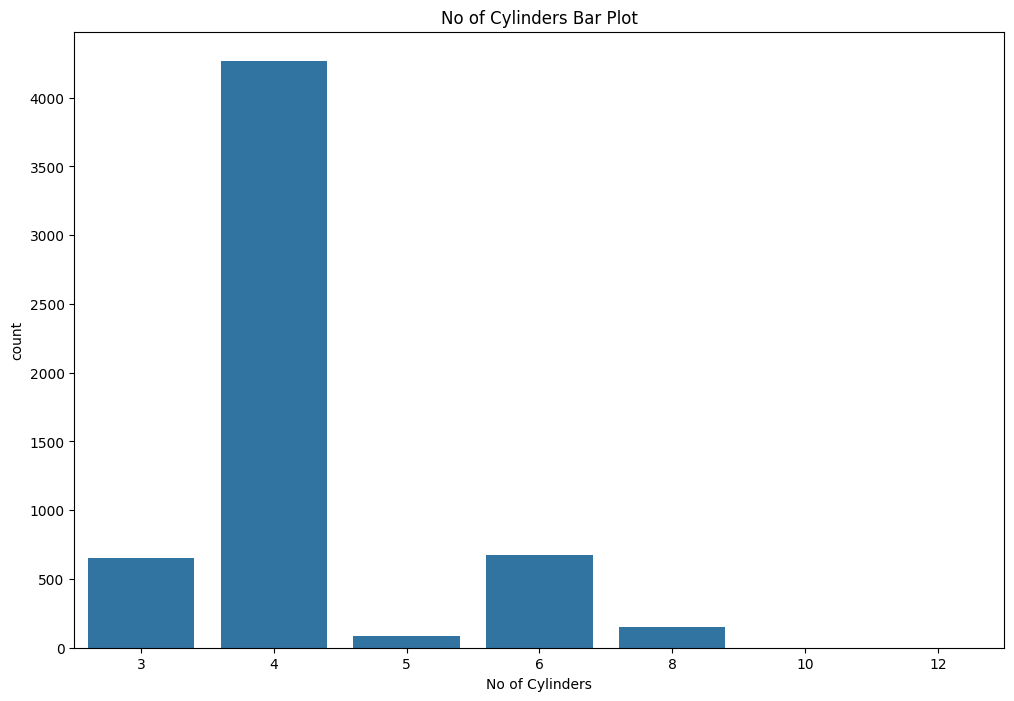

In [167]:
bar_plot(df_processed, "No of Cylinders")

Most of the cars have 4 cylinders. The number of cars with 6 cylinders and 3 cylinders are almost the same and are about one-sixth of the number of cars with 4 cylinders.

##### Dekra

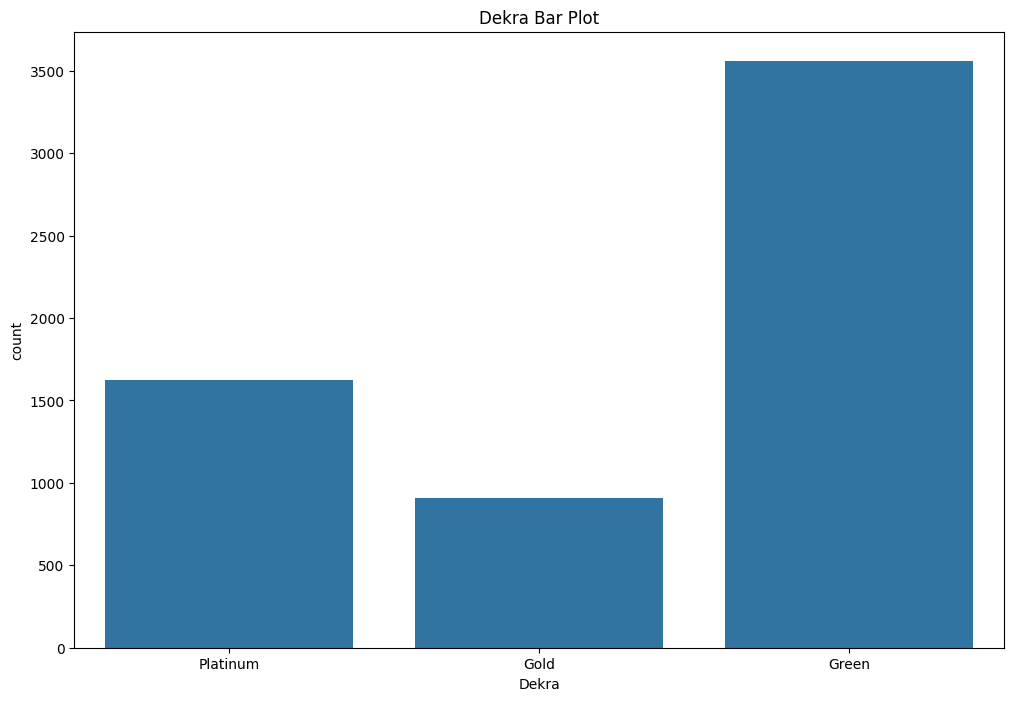

In [168]:
bar_plot(df_cleaned, "Dekra")

Most of the cars have a Dekra condition report of 'Green' which is the worst condition. After that, the cars with a Dekra condition report of 'Platinum' are the most common and are about twice as many as the cars with a Dekra condition report of 'Gold'.

##### Drive

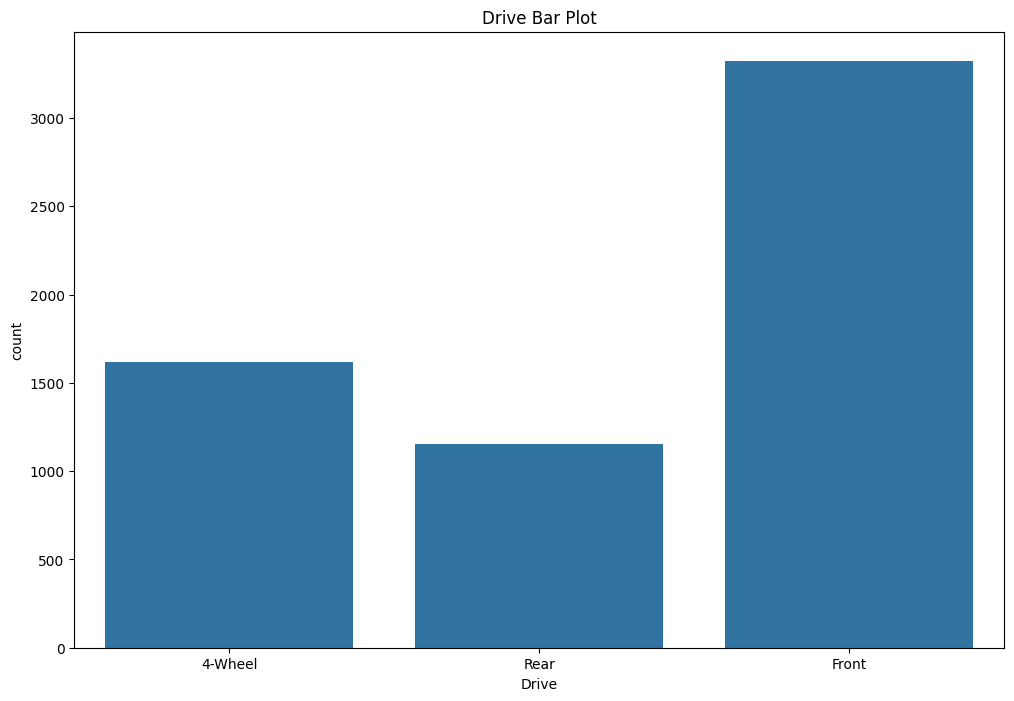

In [169]:
encoding_drive = {
    "F": "Front",
    "R": "Rear",
    "FR": "4-Wheel",
}
df_temp = df_cleaned.copy()
df_temp["Drive"] = df_temp["Drive"].apply(lambda x: encoding_drive[x])
bar_plot(df_temp, "Drive")

Most of the cars are Front Wheel Drive and it is about twice as many as the 4 Wheel Drive cars. The Rear Wheel Drive cars are the least common.

##### Engine Capacity

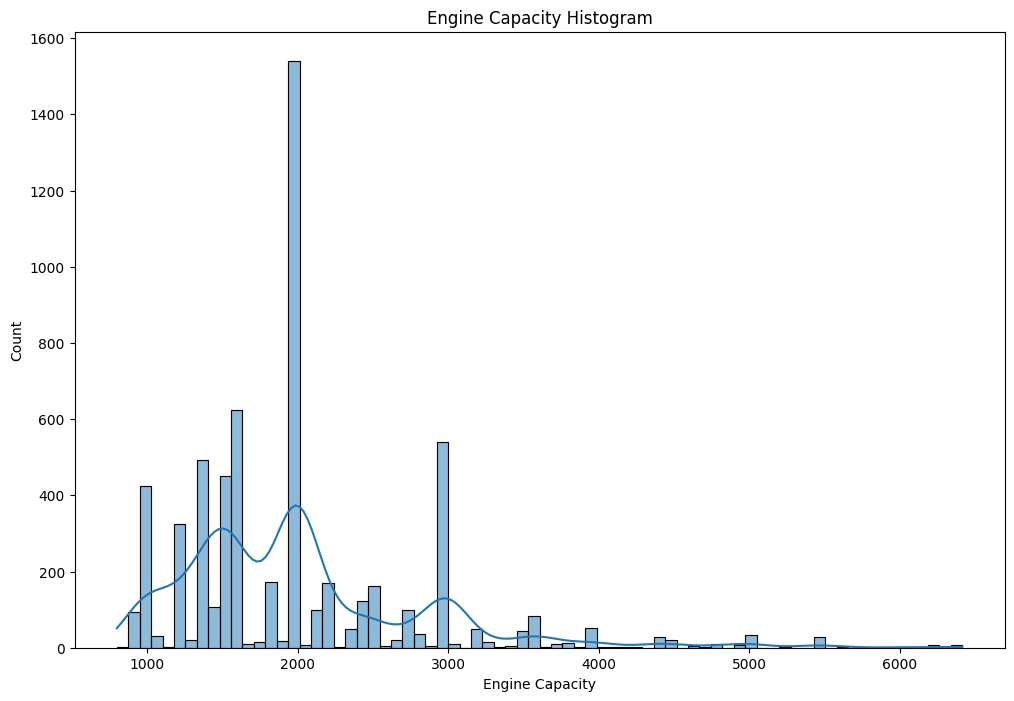

In [170]:
hist_plot(df_cleaned, "Engine Capacity")

The distribution of `Engine Capacity` is not a known distribution. However, most of the cars have an engine capacity of around 2000cc. The next 2 are 1600cc and 3000cc.

##### Finance Price

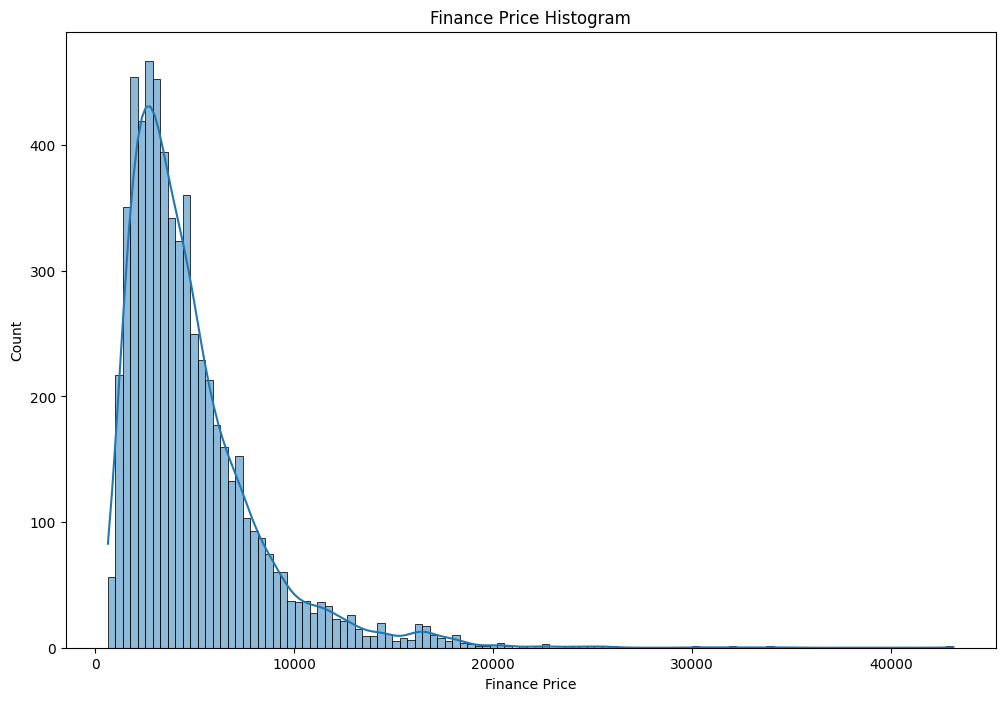

In [171]:
hist_plot(df_cleaned, "Finance Price")

The distribution of the `Finance Price` column is approximately a normal distribution which is right-skewed.

##### Fuel Consumption

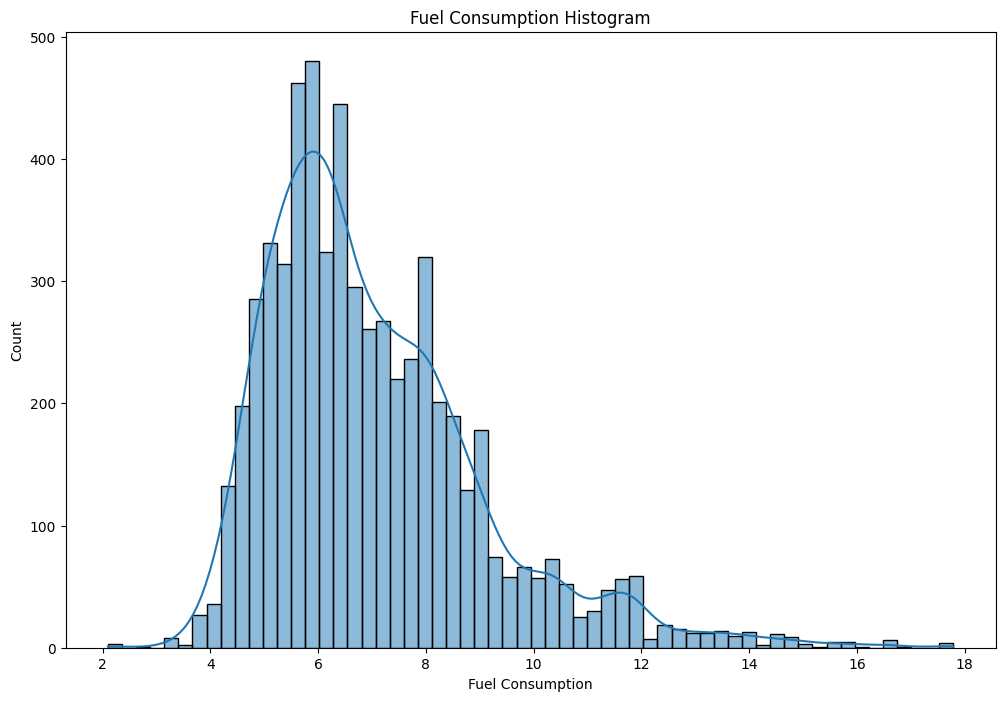

In [172]:
hist_plot(df_cleaned, "Fuel Consumption")

The distribution of the `Fuel Consumption` column is like a normal distribution with a peak at about 6. However, the distribution is not completely normal.

##### Fuel Tank Capacity

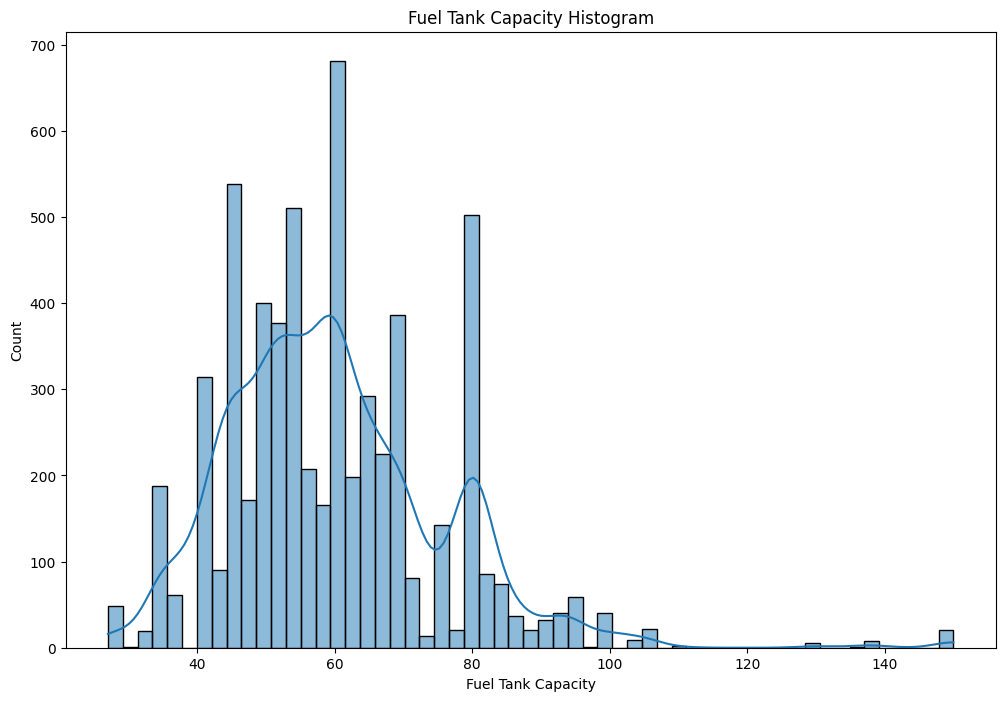

In [173]:
hist_plot(df_cleaned, "Fuel Tank Capacity")

The distribution of the `Fuel Tank Capacity` column is not a known distribution. However, most of the cars have a fuel tank capacity of around 60 liters.

##### Fuel Type

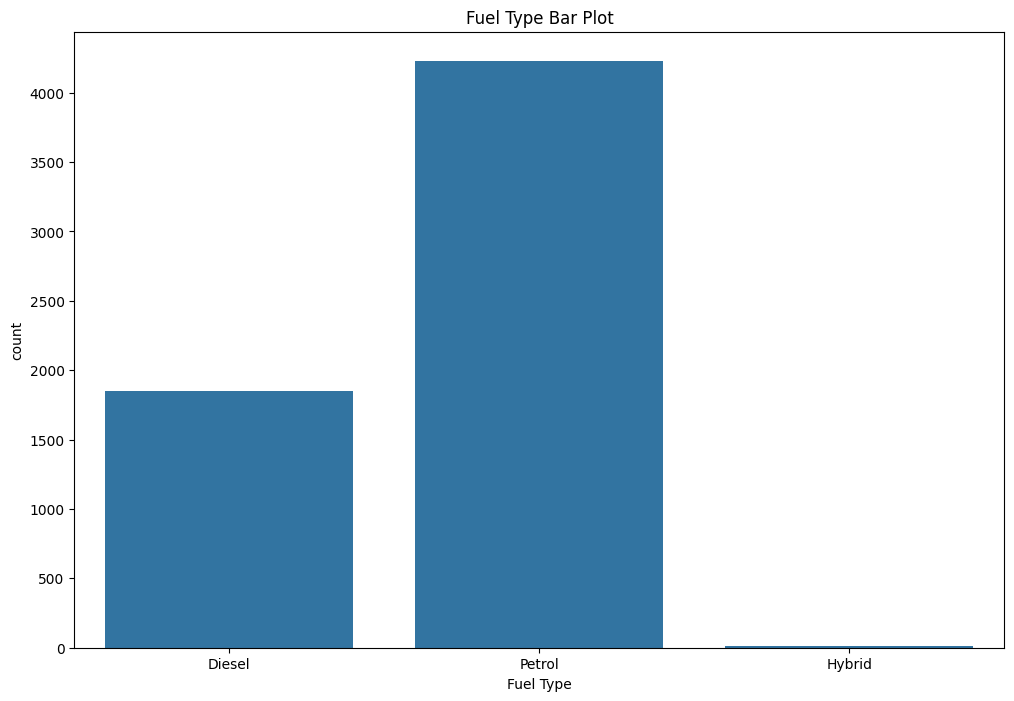

In [174]:
bar_plot(df_cleaned, "Fuel Type")

As we can see, the most common fuel type is Petrol, followed by Diesel. Hybrid is the least common fuel type.

##### Gears

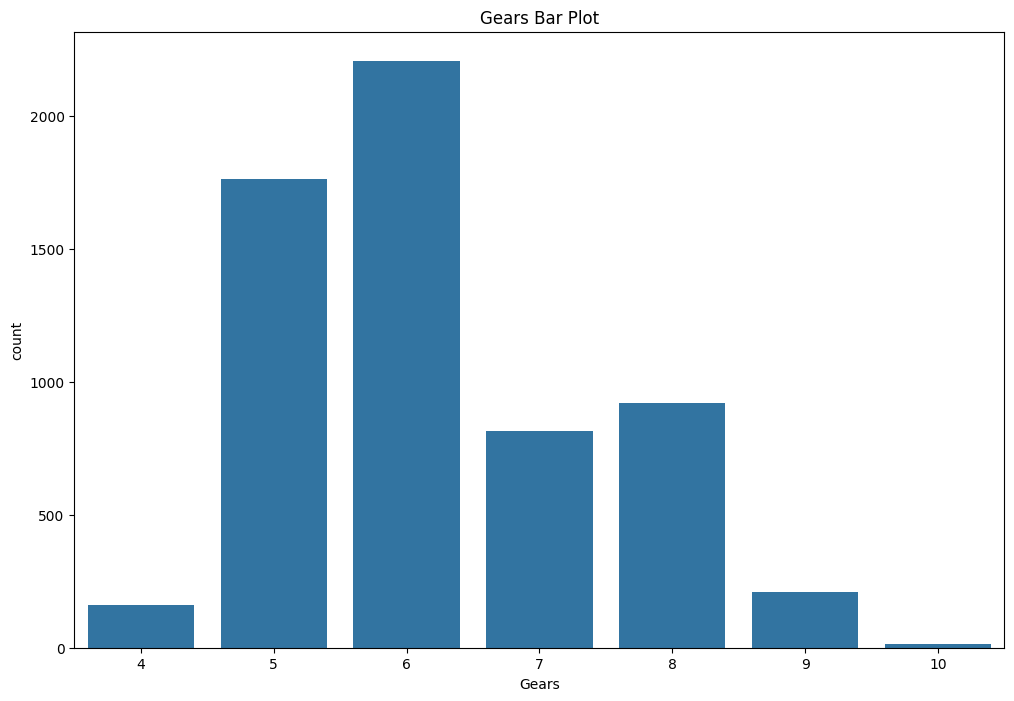

In [175]:
bar_plot(df_cleaned, "Gears")

Most of the cars have 6 gears. The number of cars with 5 gears is a little less than the number of cars with 6 gears. The number of cars with 10 gears is the least common.

##### Horsepower

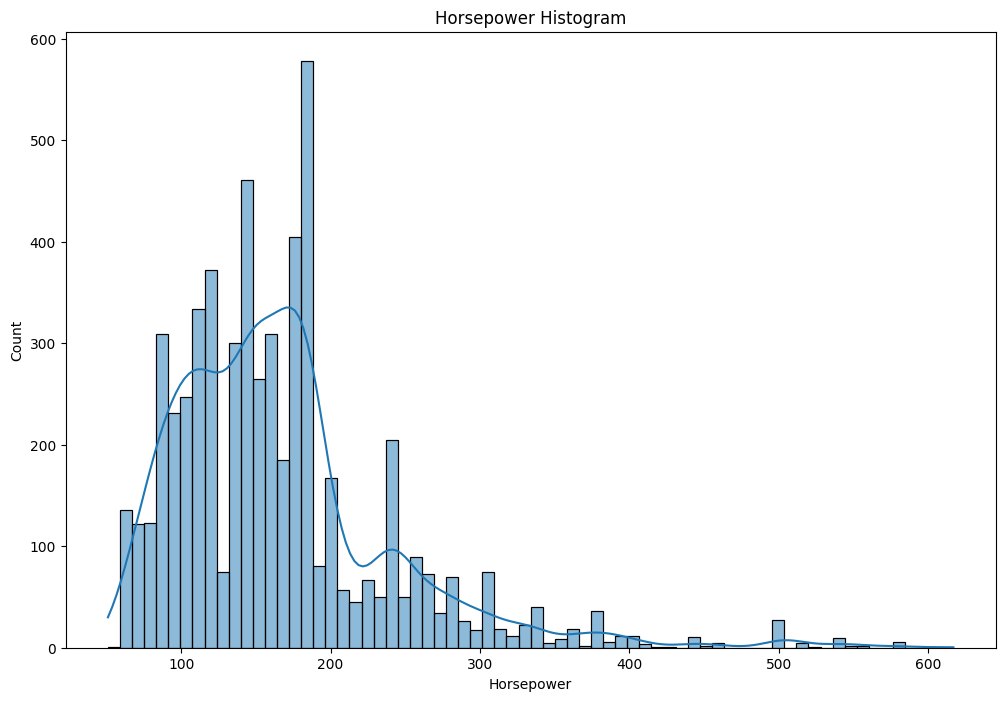

In [176]:
hist_plot(df_processed, "Horsepower")

The distribution of the `Horsepower` column is not a known distribution. However, most of the cars have a horsepower of around 180. The next most common horsepower is around 150.

##### Remaining Maintenance Plan

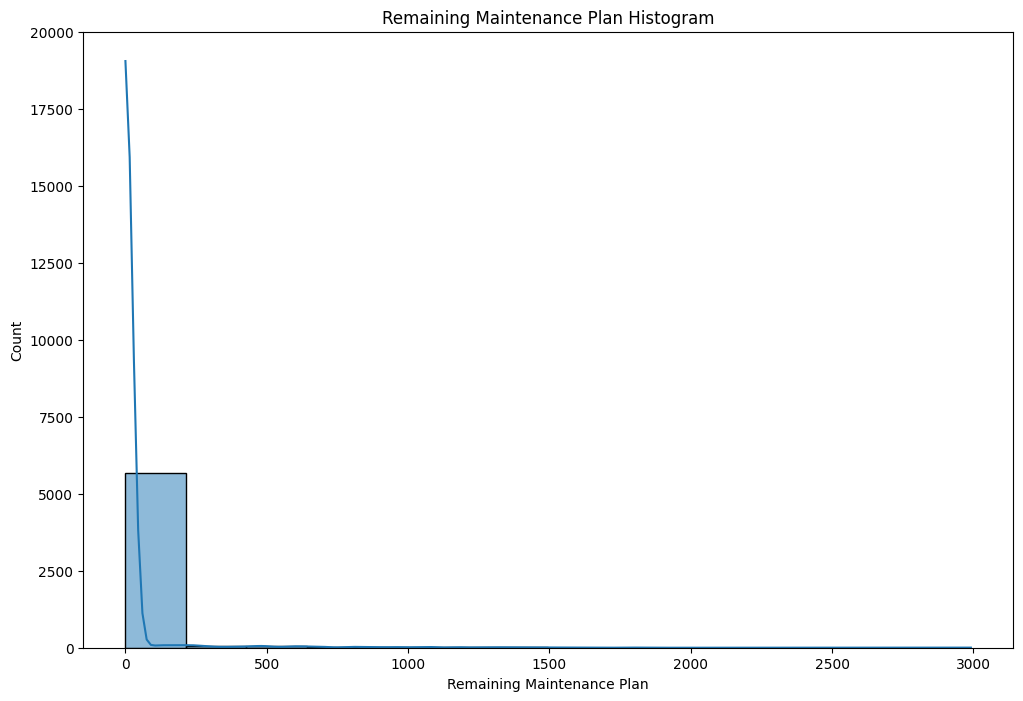

In [177]:
hist_plot(df_processed, "Remaining Maintenance Plan")

As we can see, most of the cars don't have a maintenance plan.

##### Remaining Warranty

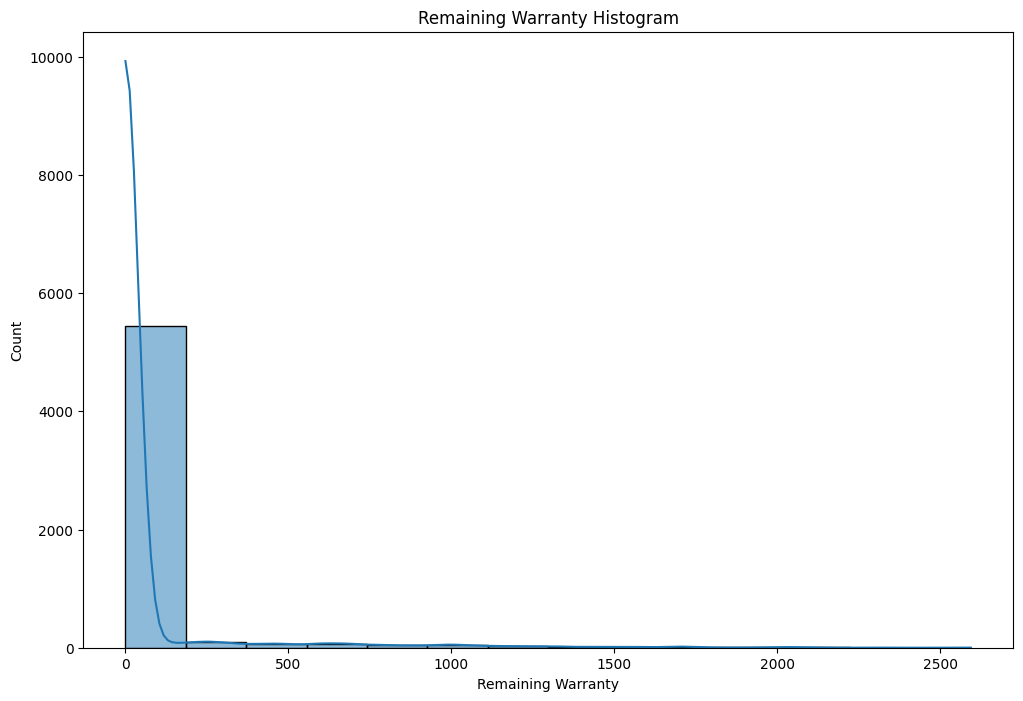

In [178]:
hist_plot(df_processed, "Remaining Warranty")

This is the same as the `Remaining Maintenance Plan` column. Most of the cars don't have a warranty.

##### No of Doors

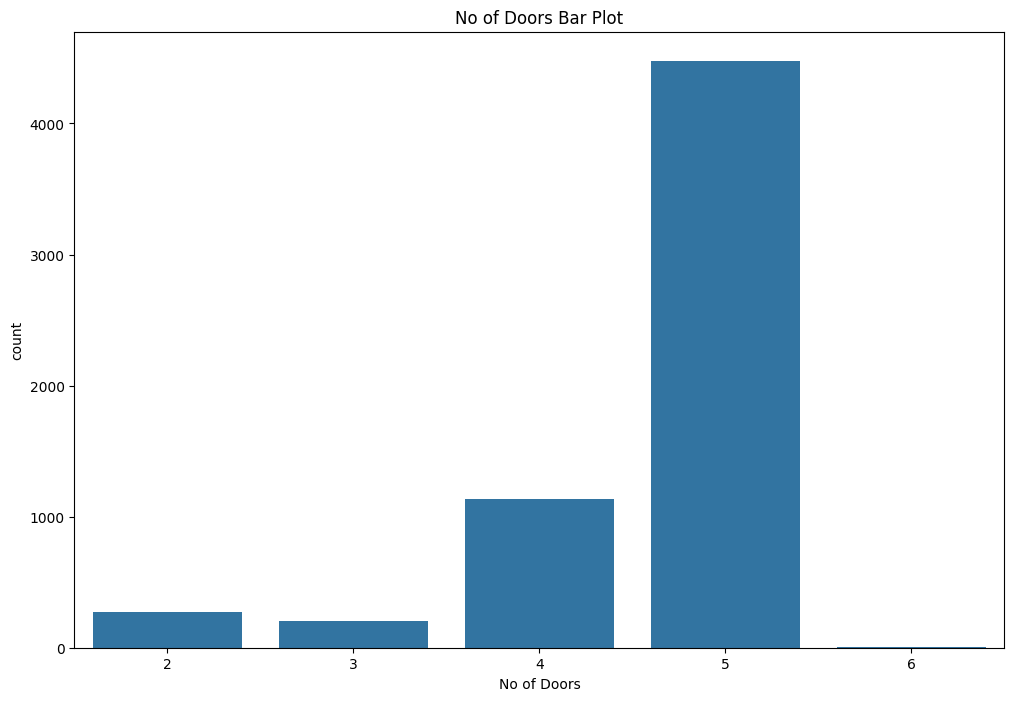

In [179]:
bar_plot(df_cleaned, "No of Doors")

The most common number of doors is 5, followed by 4. The least common number of doors is 6.

##### No of Seats

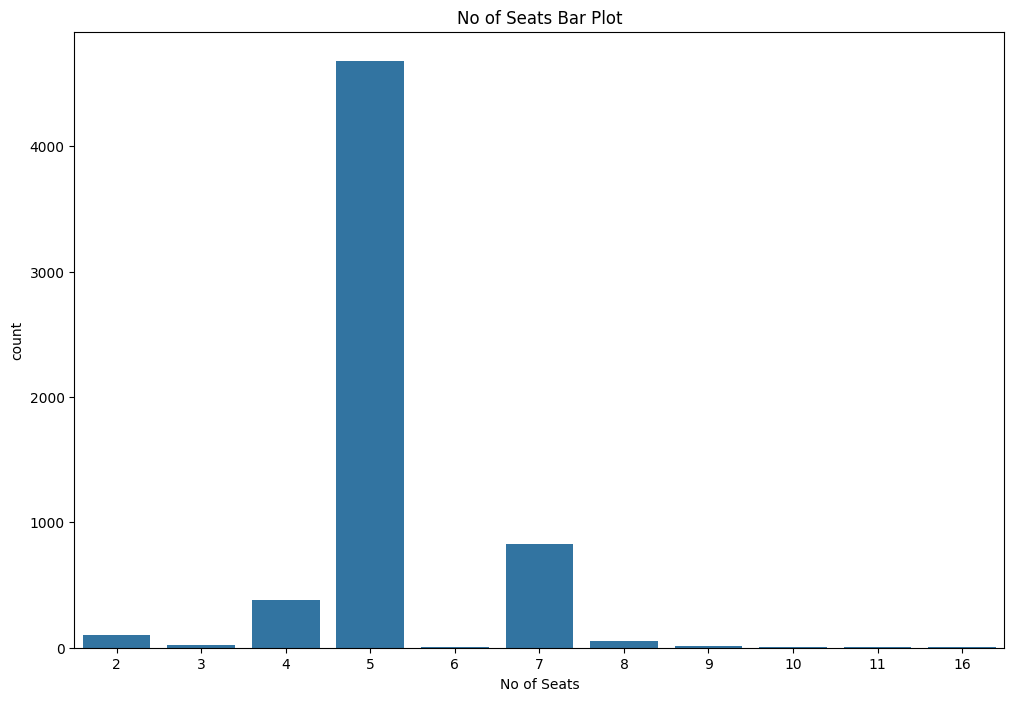

In [180]:
bar_plot(df_cleaned, "No of Seats")

Most of the cars have 5 seats. The next most common number of seats is 7.

##### Spare Key

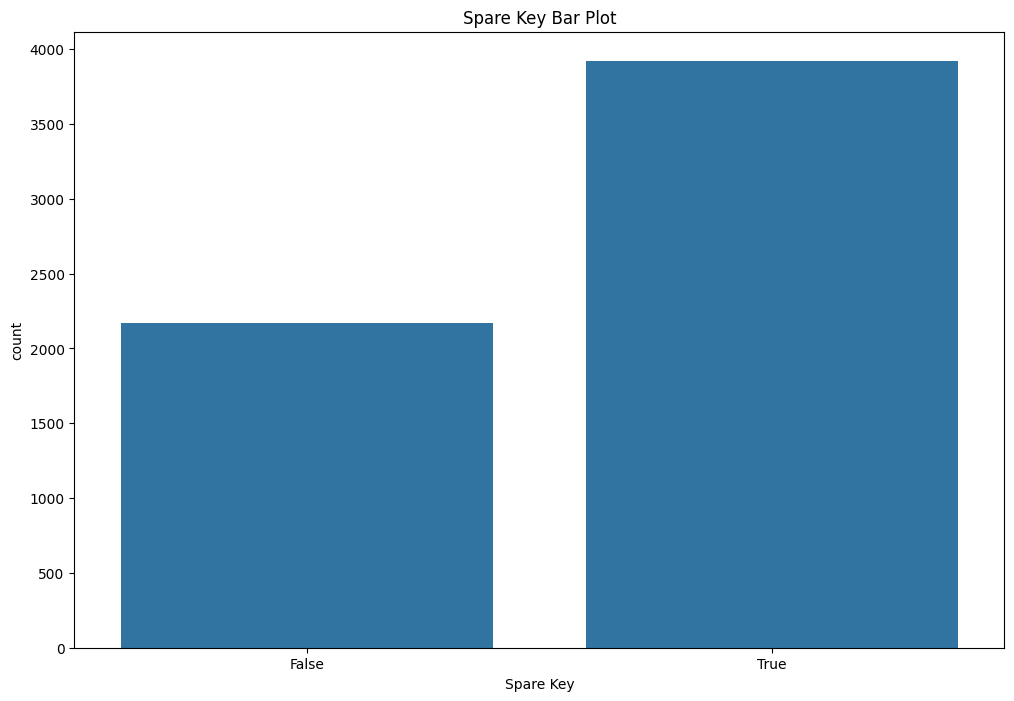

In [181]:
bar_plot(df_cleaned, "Spare Key")

The number of cars with a spare key is about twice as many as the number of cars without a spare key.

##### Transmission

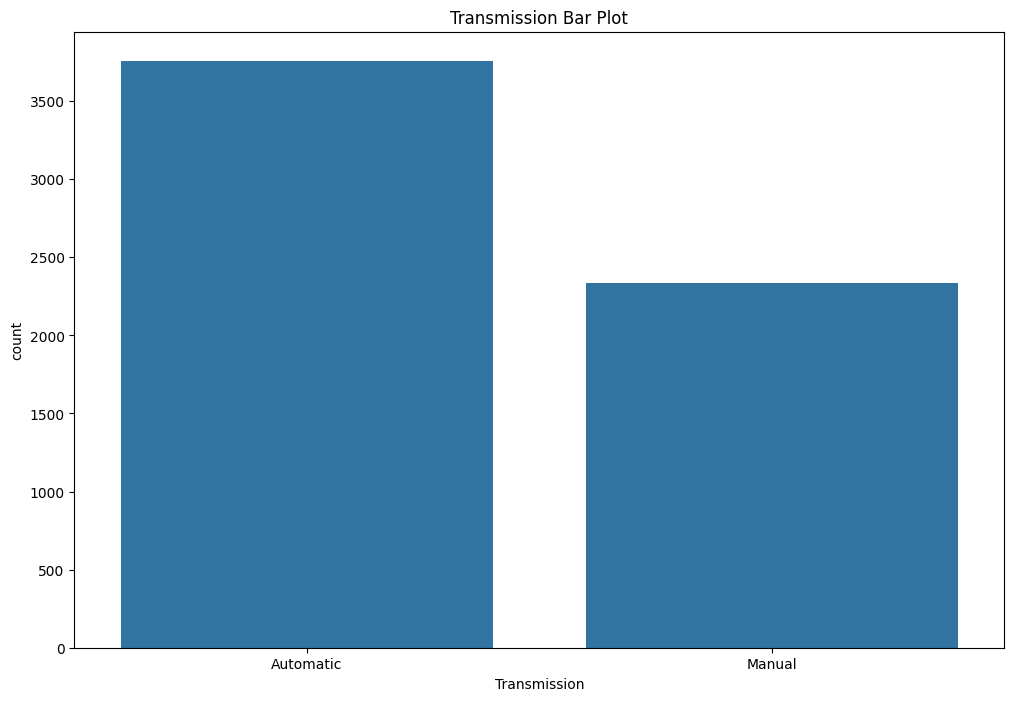

In [182]:
bar_plot(df_cleaned, "Transmission")

As we can see, the number of cars with an automatic transmission is about 1.5x as many as the number of cars with a manual transmission.

##### Vehicle Service History

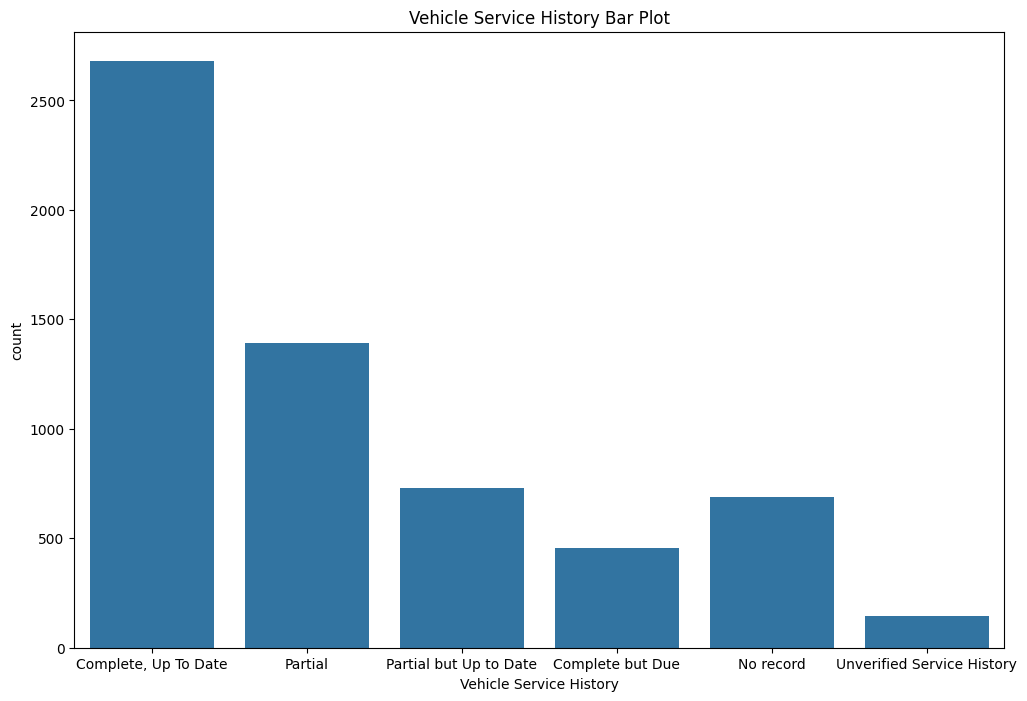

In [183]:
bar_plot(df_cleaned, "Vehicle Service History")

Most of the cars have a 'Complete, Up To Date' service history. The next most common service history is 'Partial'.

##### Price

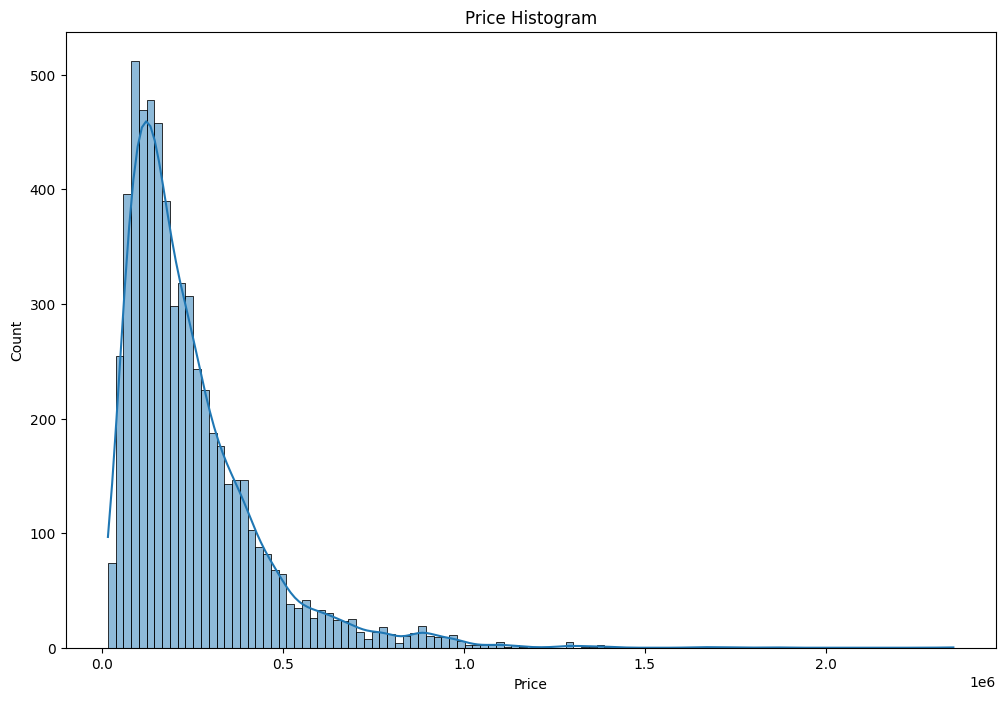

In [184]:
hist_plot(df_cleaned, "Price")

As we can see, the distribution of the `Price` column is right-skewed and approximately a normal distribution. Most of the cars are priced around 200,000.

#### Ranking

##### Top 10 Makes

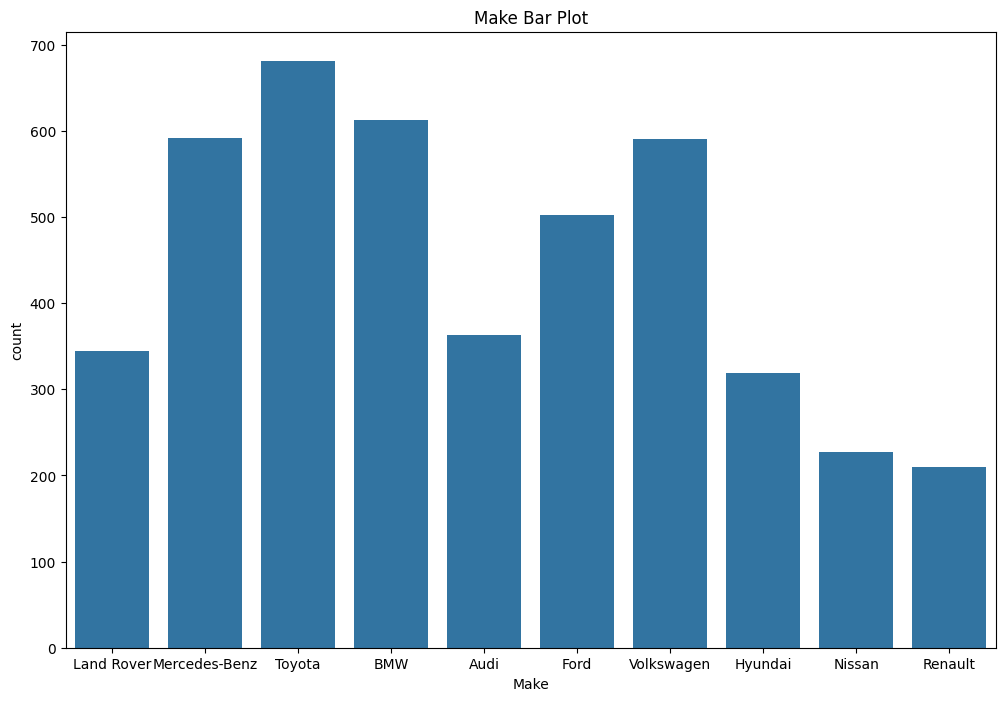

In [185]:
top_10_makes = df_cleaned["Make"].value_counts().head(10).index.values
df_temp = df_cleaned[df_cleaned["Make"].isin(top_10_makes)]
bar_plot(df_temp, "Make")

##### Top 10 Models

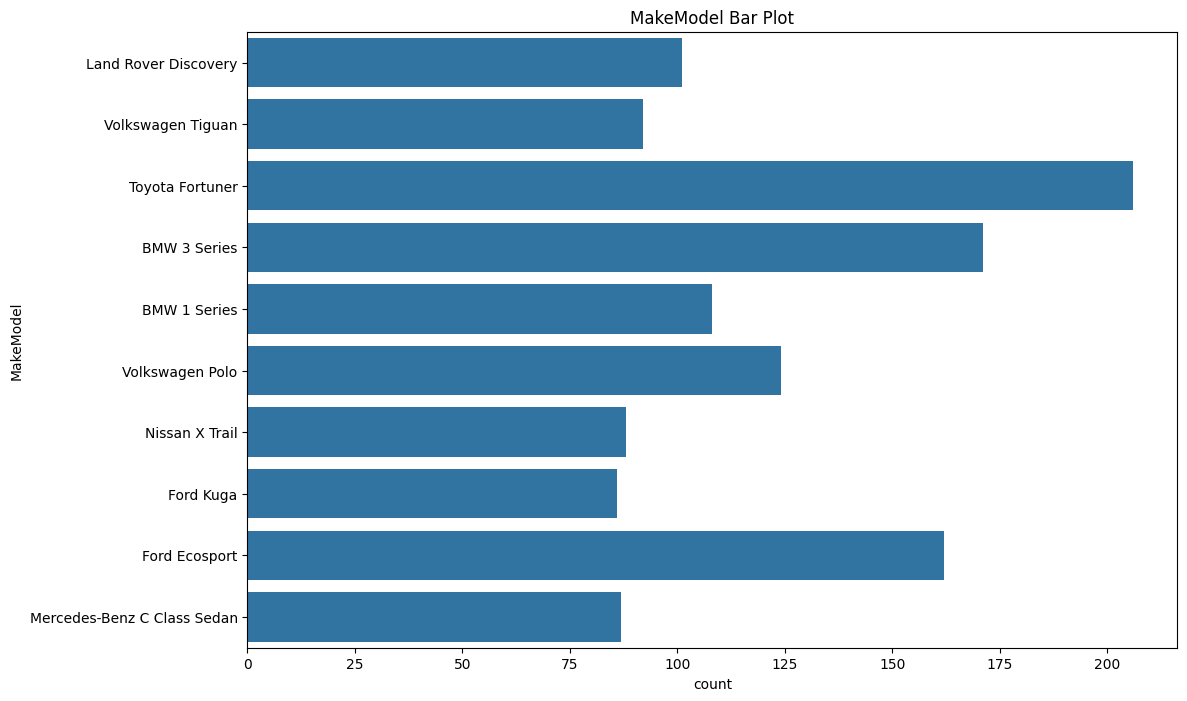

In [186]:
top_10_models = df_cleaned["Model"].value_counts().head(10).index.values
df_temp = df_cleaned[df_cleaned["Model"].isin(top_10_models)].assign(MakeModel = lambda x: x["Make"] + " " + x["Model"])
bar_plot(df_temp, "MakeModel", horizontal=True)

As we can see, the top 3 models are:

- Toyota Fortuner
- BMW 3 Series
- Ford Ecosport

##### Top 3 Body Types

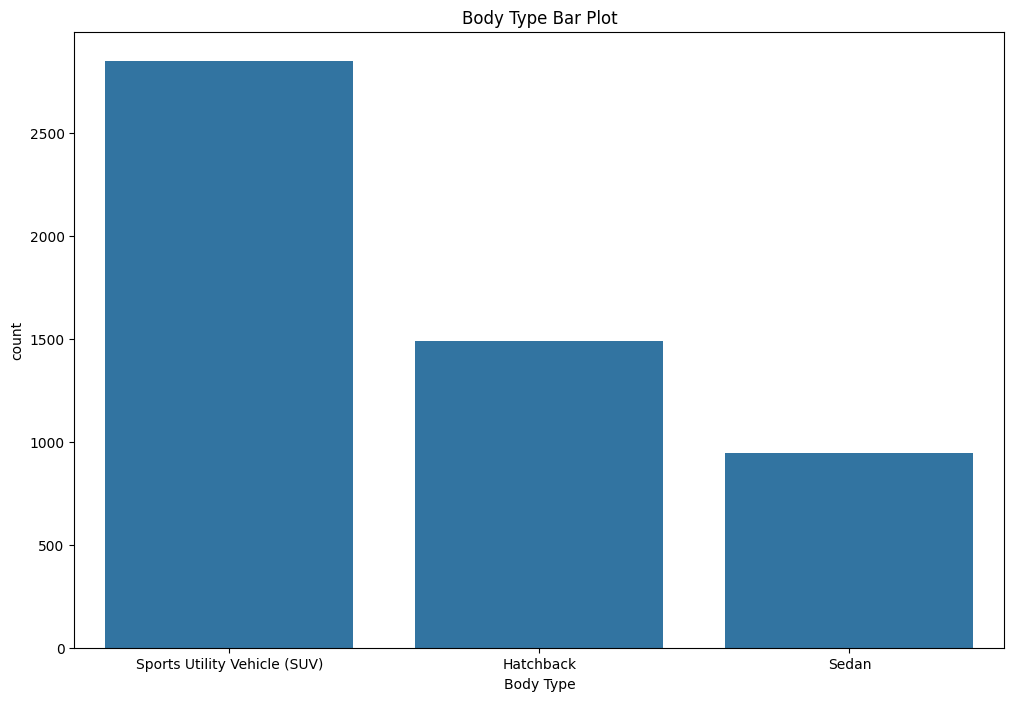

In [187]:
top_3_body_types = df_cleaned["Body Type"].value_counts().head(3).index.values
df_temp = df_cleaned[df_cleaned["Body Type"].isin(top_3_body_types)]
bar_plot(df_temp, "Body Type")

As We can see, most of the cars are SUVs, then Hatchback, and the third famous body type is Sedan.

##### Top 3 Colours

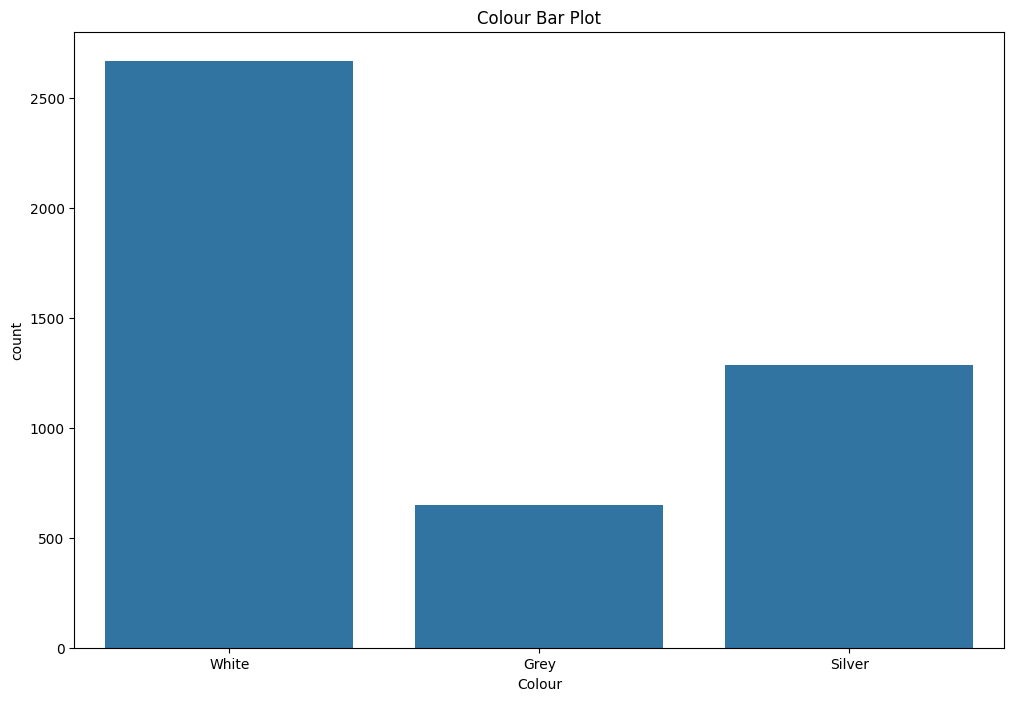

In [188]:
top_3_colours = df_cleaned["Colour"].value_counts().head(3).index.values
df_temp = df_cleaned[df_cleaned["Colour"].isin(top_3_colours)]
bar_plot(df_temp, "Colour")

White is the most famous colour in the dataset. The next famous colour is silver which is almost half of the White cars. The third one is Grey.

##### Top 3 Cylinder Layout

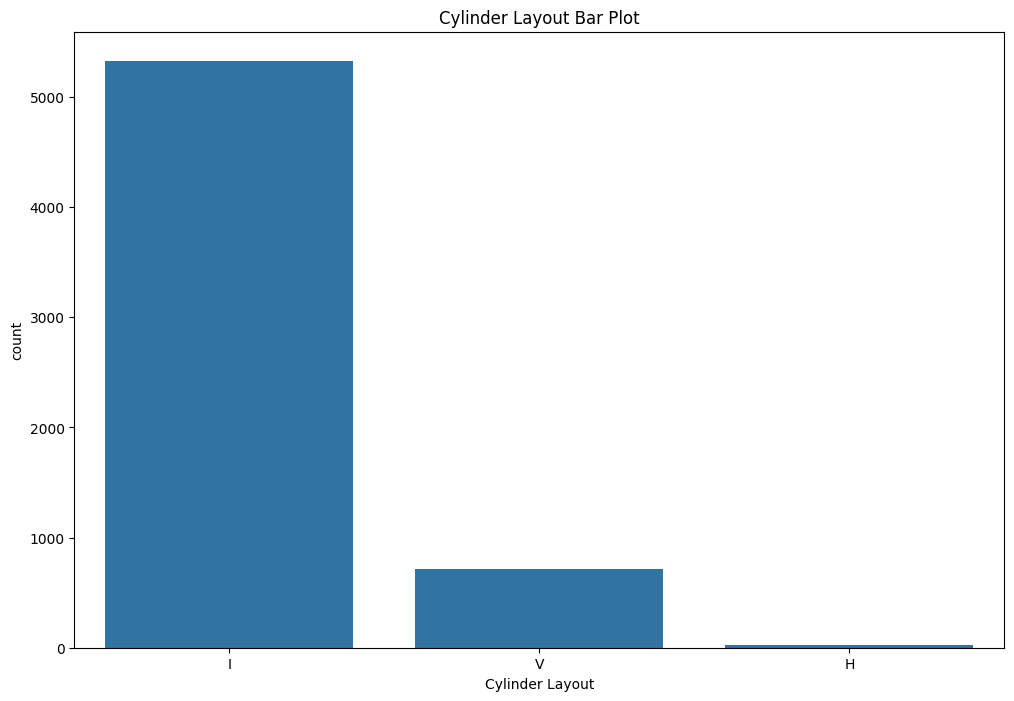

In [189]:
df_temp = df_cleaned.copy()
df_temp["Cylinder Layout"] = df_temp["Cylinder Layout"].apply(lambda x: x[0])
top_3_cylinder_layouts = df_temp["Cylinder Layout"].value_counts().head(3).index.values
df_temp = df_temp[df_temp["Cylinder Layout"].isin(top_3_cylinder_layouts)]
bar_plot(df_temp, "Cylinder Layout")

The most common cylinder layout is 'l', followed by 'V'.

#### Relationships

In [190]:
def plot_relationship(df: pd.DataFrame, x: str, y: str, plot_avg: bool = True) -> None:
    avg = df.groupby(x)[y].mean()
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x=x, y=y)
    if plot_avg:
        plt.plot(avg.index, avg, color="red", label="Average")
    plt.title(f"{x} vs {y}")
    plt.show()

##### Price vs. Registration Year

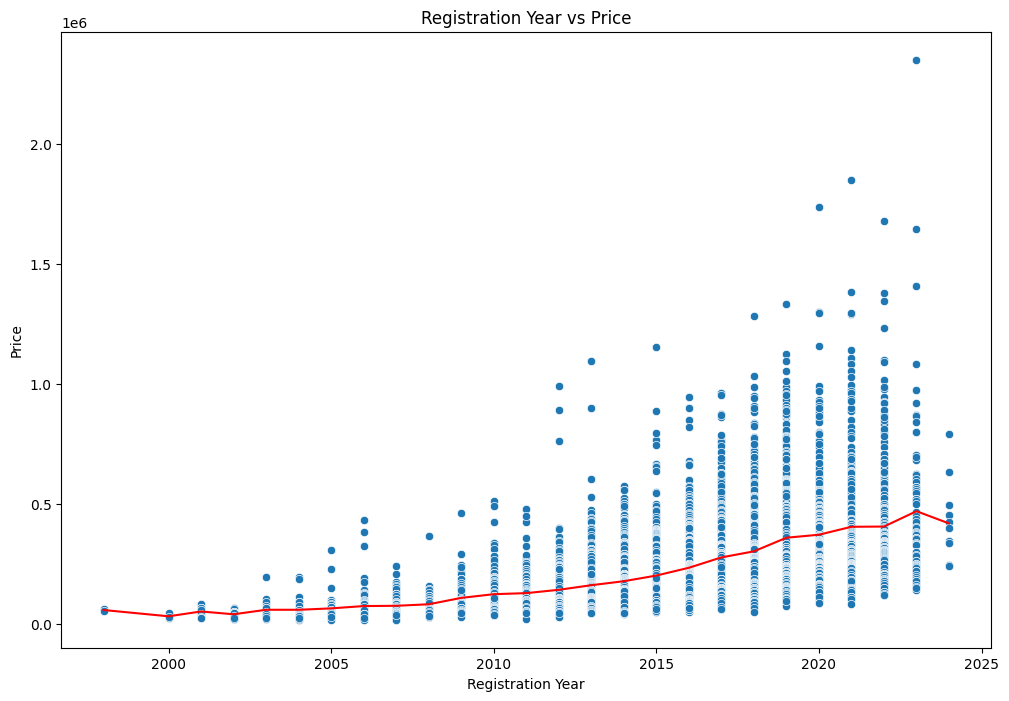

In [191]:
plot_relationship(df_cleaned, "Registration Year", "Price")

As it is visible in the above plot, we can see low prices for all the years. However, the highest prices are mostly seen in the last years.

Also, we can see that the average price of the cars is increasing with the registration year. This is expected as newer cars are usually more expensive.

##### Price vs. Mileage

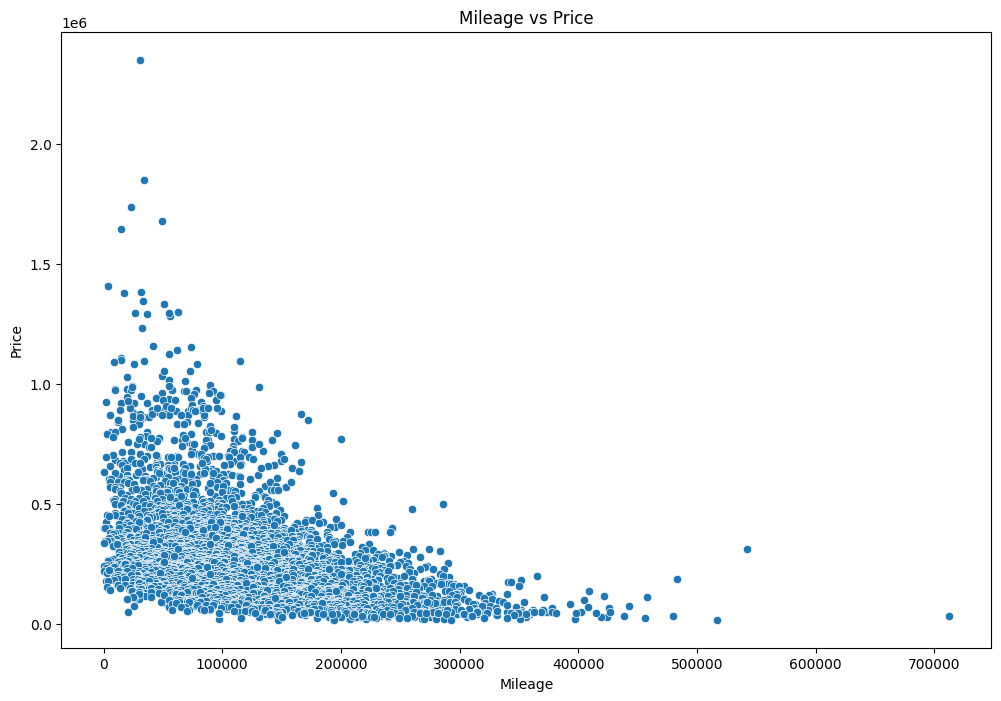

In [192]:
plot_relationship(df_cleaned, "Mileage", "Price", plot_avg=False)

As it is visible in the above plot, the price of the cars is decreasing with the mileage. This is expected as cars with higher mileage are usually cheaper.

##### Mileage vs. Registration Year

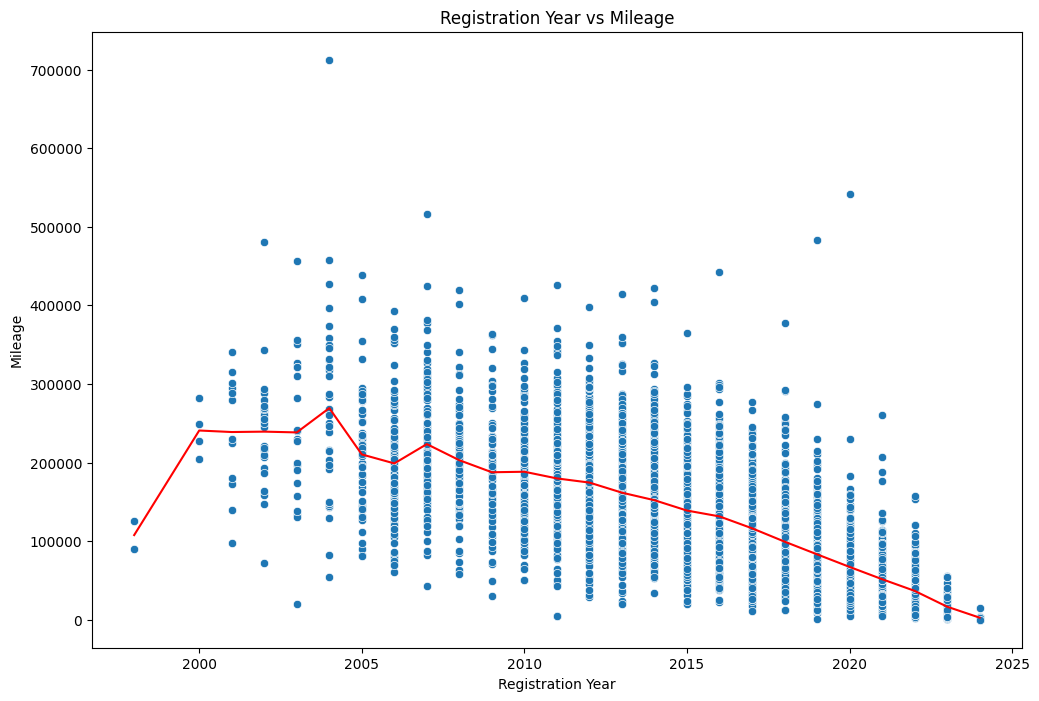

In [193]:
plot_relationship(df_cleaned, "Registration Year", "Mileage")

As it is visible in the above plot, the mileage of the cars is decreasing with the registration year. This is expected as older cars are usually driven more.

##### Engine Capacity vs. Kilowatts

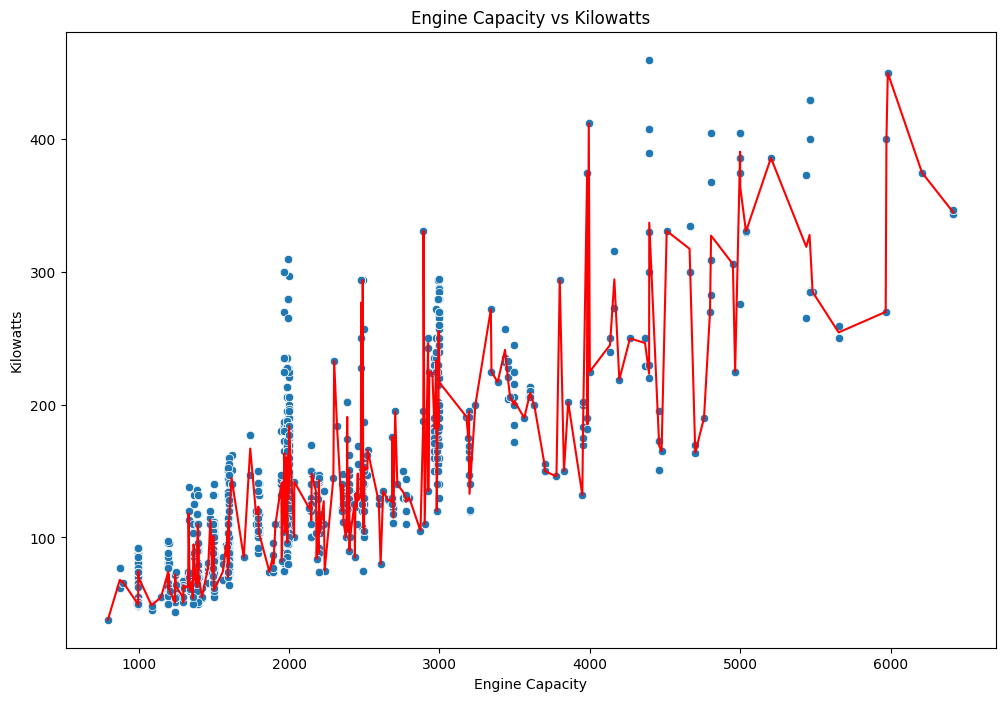

In [194]:
plot_relationship(df_cleaned, "Engine Capacity", "Kilowatts")

We can see that the kilowatts mostly increase with the engine capacity. This is expected as the engine capacity is related to the power of the car. However, we can see many up and downs in the plot. This is because the engine capacity is not the only factor that determines the power of the car.

##### Finance Price vs. Price

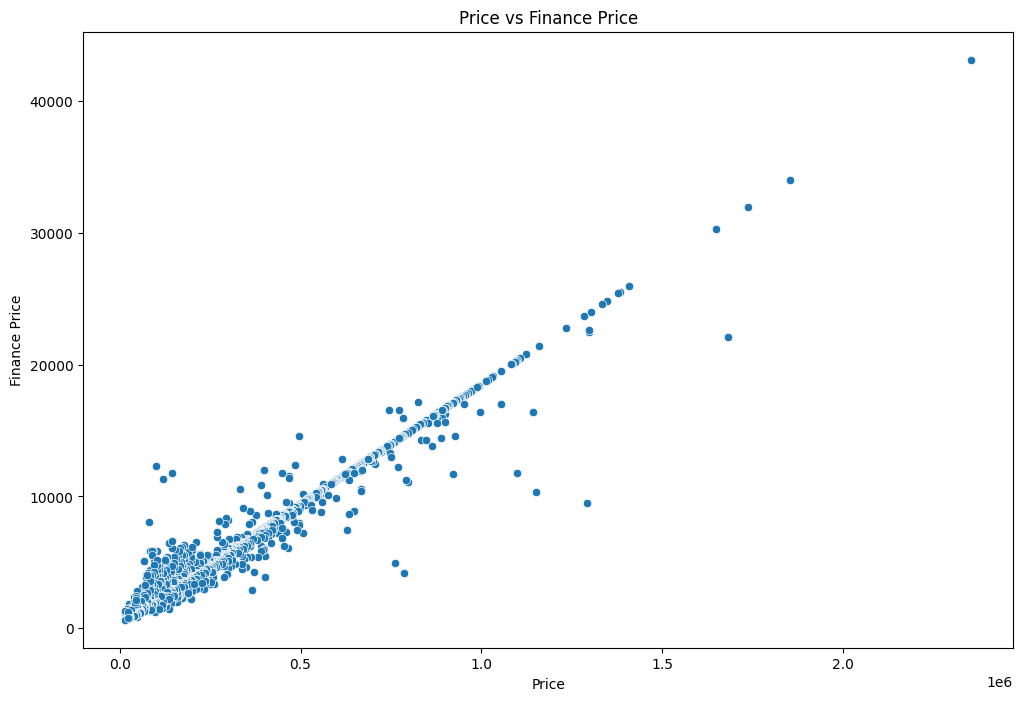

In [195]:
plot_relationship(df_cleaned, "Price", "Finance Price", plot_avg=False)

As it is visible in the above plot, the finance price is highly correlated with the price of the car. This is expected as the finance price is usually related to the selling price of the car.

## References